In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!conda install -c conda-forge folium
import folium # map rendering library
from IPython.display import HTML
import time

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.10.1              |             py_0          59 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTAL

<h3>Loading and Preparing the Neighborhoods Data for New York</h3>
Extracting Neighborhoods Data from a Relevant Page

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [5]:
nyc_neighborhoods_data = newyork_data['features']
nyc_neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

<b>Transforming the JSON Data into a Pandas Dataframe</b>

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
nyc_neighborhoods = pd.DataFrame(columns=column_names)

for data in nyc_neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    nyc_neighborhoods = nyc_neighborhoods.append({'Borough': borough,
                                                  'Neighborhood': neighborhood_name,
                                                  'Latitude': neighborhood_lat,
                                                  'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
nyc_neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [8]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(nyc_neighborhoods['Borough'].unique()),
        nyc_neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


<b>Using geopy Library to get the Coordinates of New York City</b>

In [9]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


<b>Creating a Map of New York City with neighborhoods Superimposed on Top </b>

In [10]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10, 
                         min_zoom=9, max_zoom=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(nyc_neighborhoods['Latitude'], 
                                           nyc_neighborhoods['Longitude'], 
                                           nyc_neighborhoods['Borough'], 
                                           nyc_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        weight=2,
        color='#333333',
        fill=True,
        fill_color='#ffb300',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [11]:
# The code was removed by Watson Studio for sharing.

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    """
    A function that retrieves information about venues in each neighborhood.
    It takes as input a list of the names of the neighborhoods, a list of 
    their latitudes, and a list of their longitudes.
    It returns a dataframe with information about each neighborhood and its venues.
    """
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = ('https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}'
               '&v={}&ll={},{}&intent=browse&radius={}&limit={}'
               .format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT))
            
        # make the GET request
        results = requests.get(url).json()["response"]["venues"]
            
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['name'], v['location']['lat'], 
                             v['location']['lng'], v['categories'][0]['name']) 
                            for v in results if len(v['categories']) > 0])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 
                             'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [13]:
nyc_venues = getNearbyVenues(names=nyc_neighborhoods['Neighborhood'],
                             latitudes=nyc_neighborhoods['Latitude'],
                             longitudes=nyc_neighborhoods['Longitude']
                            )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [14]:
# Removing records where venue is "building" or "office" or "Bus Stop" as we will using venues for comparison
nyc_venues = nyc_venues[~nyc_venues['Venue Category'].isin(['Building', 'Office', 'Bus Line', 'Bus Stop','Bus Station','Road'])]
print(nyc_venues.shape)
nyc_venues.head()

(23783, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

                Venue  Venue Latitude  Venue Longitude     Venue Category  
0               Shell       40.894187       -73.845862        Gas Station  
1         Pitman Deli       40.894149       -73.845748               Food  
2    Carvel Ice Cream       40.890487       -73.848568     Ice Cream Shop  
3    Lollipops Gelato       40.894123       -73.845892       Dessert Shop  
4  Pittman Ave bodega       40.894241       -73.845763  Convenience Store

Let's check how many venues were returned for each neighborhood

In [15]:
nyc_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      82                      82   
Annadale                                      77                      77   
Arden Heights                                 69                      69   
Arlington                                     72                      72   
Arrochar                                      78                      78   
Arverne                                       80                      80   
Astoria                                       75                      75   
Astoria Heights                               62                      62   
Auburndale                                    62                      62   
Bath Beach                                    86                      86   
Battery Park City                             86                      86   
Bay Ridge                                     87                      87   
Bay Terrace                                  159                     159   
Baychester                                    80                      80   
Bayside                                       84                      84   
Bayswater                                     79                      79   
Bedford Park                                  69                      69   
Bedford Stuyvesant                            86                      86   
Beechhurst                                    89                      89   
Bellaire                                      78                      78   
Belle Harbor                                  81                      81   
Bellerose                                     78                      78   
Belmont                                       62                      62   
Bensonhurst                                   84                      84   
Bergen Beach                                  77                      77   
Blissville                                    77                      77   
Bloomfield                                    72                      72   
Boerum Hill                                   90                      90   
Borough Park                                  35                      35   
Breezy Point                                  72                      72   
Briarwood                                     76                      76   
Brighton Beach                                90                      90   
Broad Channel                                 86                      86   
Broadway Junction                             71                      71   
Bronxdale                                     69                      69   
Brooklyn Heights                              40                      40   
Brookville                                    64                      64   
Brownsville                                   85                      85   
Bulls Head                                    71                      71   
Bushwick                                      67                      67   
Butler Manor                                  72                      72   
Cambria Heights                               78                      78   
Canarsie                                      68                      68   
Carnegie Hill                                 85                      85   
Carroll Gardens                               85                      85   
Castle Hill                                   78                      78   
Castleton Corners                             80                      80   
Central Harlem                                84                      84   
Charleston                                    83                      83   
Chelsea                                      165                     165   
Chinatown                                     89                      89   

In [16]:
nyc_neighborhoods.shape[0], nyc_venues['Neighborhood'].unique().shape[0]

(306, 302)

We notice that there are 302 neighborhoods in the table while we had 306 neighborhoods before we got the data from Foursquare. This means that Foursquare didn't return any venue for a few neighborhoods.

In [17]:
nyc_excluded_neighborhoods = set(nyc_neighborhoods['Neighborhood']).difference(nyc_venues['Neighborhood'])
nyc_excluded_neighborhoods

set()

<b>Let's find out how many unique categories can be curated from all the returned venues</b>

In [18]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 579 uniques categories.


In [19]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
# we used Neighborhood_" instead of just "Neighborhood" because
# there is a venue category called "Neighborhood"
nyc_onehot['Neighborhood_'] = nyc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

nyc_onehot.head()

Neighborhood_  ATM  Accessories Store  Acupuncturist  Adult Boutique  \
0     Wakefield    0                  0              0               0   
1     Wakefield    0                  0              0               0   
2     Wakefield    0                  0              0               0   
3     Wakefield    0                  0              0               0   
4     Wakefield    0                  0              0               0   

   Advertising Agency  Afghan Restaurant  African Restaurant  Airport  \
0                   0                  0                   0        0   
1                   0                  0                   0        0   
2                   0                  0                   0        0   
3                   0                  0                   0        0   
4                   0                  0                   0        0   

   Airport Gate  Airport Terminal  Airport Tram  Alternative Healer  \
0             0                 0             0                   0   
1             0                 0             0                   0   
2             0                 0             0                   0   
3             0                 0             0                   0   
4             0                 0             0                   0   

   American Restaurant  Animal Shelter  Antique Shop  Arcade  \
0                    0               0             0       0   
1                    0               0             0       0   
2                    0               0             0       0   
3                    0               0             0       0   
4                    0               0             0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Art Studio  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0           0                    0                     0                 0   
1           0                    0                     0                 0   
2           0                    0                     0                 0   
3           0                    0                     0                 0   
4           0                    0                     0                 0   

   Assisted Living  Astrologer  Athletics & Sports  Auditorium  \
0                0           0                   0           0   
1                0           0                   0           0   
2                0           0                   0           0   
3                0           0                   0           0   
4                0           0                   0           0   

   Australian Restaurant  Auto Dealership  Auto Garage  Auto Workshop  \
0                      0                0            0              0   
1                      0                0            0              0   
2                      0                0            0              0   
3                      0                0            0              0   
4                      0                0            0              0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Baggage Claim  \
0                0          0           0           0              0   
1                0          0           0           0              0   
2                0          0           0           0              0   
3                0          0           0           0              0   
4                0          0           0           0              0   

   Baggage Locker  Bakery  Ballroom  Bank  Bar  Baseball Field  \
0               0       0         0     0    0               0   
1  

<b>Grouping rows by neighborhood and taking the mean of the frequency of occurrence of each category for each neighborhood</b>

In [20]:
nyc_grouped = nyc_onehot.groupby('Neighborhood_').mean().reset_index()
nyc_grouped.head()

Neighborhood_  ATM  Accessories Store  Acupuncturist  Adult Boutique  \
0       Allerton  0.0                0.0            0.0             0.0   
1       Annadale  0.0                0.0            0.0             0.0   
2  Arden Heights  0.0                0.0            0.0             0.0   
3      Arlington  0.0                0.0            0.0             0.0   
4       Arrochar  0.0                0.0            0.0             0.0   

   Advertising Agency  Afghan Restaurant  African Restaurant  Airport  \
0                 0.0                0.0                 0.0      0.0   
1                 0.0                0.0                 0.0      0.0   
2                 0.0                0.0                 0.0      0.0   
3                 0.0                0.0                 0.0      0.0   
4                 0.0                0.0                 0.0      0.0   

   Airport Gate  Airport Terminal  Airport Tram  Alternative Healer  \
0           0.0               0.0           0.0                 0.0   
1           0.0               0.0           0.0                 0.0   
2           0.0               0.0           0.0                 0.0   
3           0.0               0.0           0.0                 0.0   
4           0.0               0.0           0.0                 0.0   

   American Restaurant  Animal Shelter  Antique Shop    Arcade  \
0             0.000000             0.0           0.0  0.000000   
1             0.038961             0.0           0.0  0.000000   
2             0.000000             0.0           0.0  0.000000   
3             0.027778             0.0           0.0  0.013889   
4             0.000000             0.0           0.0  0.000000   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                     0.0          0.0         0.0   
1               0.0                     0.0          0.0         0.0   
2               0.0                     0.0          0.0         0.0   
3               0.0                     0.0          0.0         0.0   
4               0.0                     0.0          0.0         0.0   

   Art Studio  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0         0.0             0.000000                   0.0               0.0   
1         0.0             0.000000                   0.0               0.0   
2         0.0             0.014493                   0.0               0.0   
3         0.0             0.000000                   0.0               0.0   
4         0.0             0.000000                   0.0               0.0   

   Assisted Living  Astrologer  Athletics & Sports  Auditorium  \
0              0.0         0.0            0.000000         0.0   
1              0.0         0.0            0.000000         0.0   
2              0.0         0.0            0.000000         0.0   
3              0.0         0.0            0.000000         0.0   
4              0.0         0.0            0.012821         0.0   

   Australian Restaurant  Auto Dealership  Auto Garage  Auto Workshop  \
0                    0.0              0.0          0.0            0.0   
1                    0.0              0.0          0.0            0.0   
2                    0.0              0.0          0.0            0.0   
3                    0.0              0.0          0.0            0.0   
4                    0.0              0.0          0.0            0.0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Baggage Claim  \
0         0.024390        0.0         0.0    0.000000            0.0   
1         0.012987        0.0         0.0    0.012987            0.0   
2         0.000000        0.0         0.0    0.014493            0.0   
3         0.027778        0.0         0.0    0.000000            0.0   
4         0.000000        0.0         0.0    0.025641            0.0   

   Baggage Locker    Bakery  Ballroom      Bank       Bar  Baseball Field  \
0             0.0  0.000000       0.0  0.

<b> Top 10 venues for each neighborhood</b>

In [21]:
def return_most_common_venues(row, num_top_cat):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_cat]

num_top_cat = 7
indicators = ['st', 'nd', 'rd']

In [22]:
# create columns according to number of top venues
columns = ['Neighborhood_']
for ind in np.arange(num_top_cat):
    try:
        columns.append('{}{} Most Common Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Category'.format(ind+1))

# create a new dataframe
nyc_neighborhoods_categories_sorted = pd.DataFrame(columns=columns)
nyc_neighborhoods_categories_sorted['Neighborhood_'] = nyc_grouped['Neighborhood_']

for ind in np.arange(nyc_grouped.shape[0]):
    nyc_neighborhoods_categories_sorted.iloc[ind, 1:] = return_most_common_venues(
        nyc_grouped.iloc[ind, :], num_top_cat)

nyc_neighborhoods_categories_sorted.head()

Neighborhood_     1st Most Common Category  \
0       Allerton           Salon / Barbershop   
1       Annadale           Salon / Barbershop   
2  Arden Heights                         Pool   
3      Arlington  Professional & Other Places   
4       Arrochar                Deli / Bodega   

                   2nd Most Common Category 3rd Most Common Category  \
0                           Laundry Service               Non-Profit   
1                               Pizza Place            Tattoo Parlor   
2               Professional & Other Places          Doctor's Office   
3  Residential Building (Apartment / Condo)            Deli / Bodega   
4                                Food Truck          Doctor's Office   

  4th Most Common Category 5th Most Common Category 6th Most Common Category  \
0            Deli / Bodega              Gas Station              Pizza Place   
1               Nail Salon      American Restaurant                      Spa   
2         Dentist's Office                     Taxi             Cocktail Bar   
3           Hardware Store                   Church       Salon / Barbershop   
4              Pizza Place              Dry Cleaner                    Beach   

  7th Most Common Category  
0                 Pharmacy  
1               Restaurant  
2                   Church  
3          Laundry Service  
4             Liquor Store

<h4>Clustering<h4>
    Now we apply K-means clustering on the dataframe stored in nyc_grouped variable which includes the relative frequency of each venue-category for each neighborhood.

In [23]:
# set number of clusters
kclusters = 5

nyc_grouped_clustering = nyc_grouped.drop('Neighborhood_', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [24]:
# add clustering labels
nyc_neighborhoods_categories_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nyc_merged = nyc_neighborhoods.rename(columns={'Neighborhood': 'Neighborhood_'}).copy()
nyc_merged = nyc_merged[~nyc_merged['Neighborhood_'].isin(nyc_excluded_neighborhoods)]

# merge nyc_grouped with nyc_data to add latitude/longitude for each neighborhood
nyc_merged = nyc_merged.join(nyc_neighborhoods_categories_sorted.set_index('Neighborhood_'), on='Neighborhood_')

nyc_merged.head() # check the last columns!

Borough Neighborhood_   Latitude  Longitude  Cluster Labels  \
0   Bronx     Wakefield  40.894705 -73.847201               3   
1   Bronx    Co-op City  40.874294 -73.829939               0   
2   Bronx   Eastchester  40.887556 -73.827806               0   
3   Bronx     Fieldston  40.895437 -73.905643               4   
4   Bronx     Riverdale  40.890834 -73.912585               1   

                   1st Most Common Category  \
0                        Salon / Barbershop   
1                                    School   
2                           Automotive Shop   
3                    College Residence Hall   
4  Residential Building (Apartment / Condo)   

                   2nd Most Common Category  \
0                           Laundry Service   
1  Residential Building (Apartment / Condo)   
2                      Caribbean Restaurant   
3                                 Synagogue   
4                                 Synagogue   

                   3rd Most Common Category    4th Most Common Category  \
0                                    Church                        Food   
1                                    Church  Financial or Legal Service   
2                           Auto Dealership               Metro Station   
3  Residential Building (Apartment / Condo)           College Cafeteria   
4                           Doctor's Office                  Playground   

  5th Most Common Category 6th Most Common Category  \
0              Gas Station              Music Venue   
1                 Pharmacy              Art Gallery   
2              Gas Station                    Diner   
3                   Church           Student Center   
4                     Park                Beach Bar   

          7th Most Common Category  
0                  Doctor's Office  
1                          Parking  
2                           Bridge  
3  College Administrative Building  
4                             Pool

<b>Creating a map that shows the neighborhoods and their clusters</b><br>
We will create a map that shows a marker for each neighborhood; the color of the marker represents the cluster of the neighborhood

In [25]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9,
                          min_zoom=8, max_zoom=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], 
                                  nyc_merged['Neighborhood_'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        weight=1,
        popup=label,
        color='#333333',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

<b> Examining clusters</b><br>
Let's see the neighborhoods in each of the five clusters:<br>


In [26]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 0, 
               nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

Neighborhood_                  1st Most Common Category  \
1             Co-op City                                    School   
2            Eastchester                           Automotive Shop   
5            Kingsbridge                           Laundry Service   
10            Baychester                               Gas Station   
12           City Island                           Harbor / Marina   
16               Fordham                            Clothing Store   
18            West Farms                           Automotive Shop   
23              Longwood                               Pizza Place   
24           Hunts Point                           Automotive Shop   
25            Morrisania  Residential Building (Apartment / Condo)   
27          Clason Point                                      Park   
28           Throgs Neck                      Other Great Outdoors   
29          Country Club                               Pizza Place   
31    Westchester Square                                Nail Salon   
36       North Riverdale                        Salon / Barbershop   
37            Pelham Bay                            Medical Center   
39        Edgewater Park                        Chinese Restaurant   
40           Castle Hill                            Emergency Room   
47           Bensonhurst                           Doctor's Office   
48           Sunset Park                               Pizza Place   
49            Greenpoint  Residential Building (Apartment / Condo)   
50             Gravesend                           Automotive Shop   
51        Brighton Beach                        Salon / Barbershop   
55         Crown Heights  Residential Building (Apartment / Condo)   
57            Kensington                             Grocery Store   
58       Windsor Terrace                                    Bridge   
60           Brownsville                                    Church   
63    Bedford Stuyvesant                             Deli / Bodega   
70            Park Slope  Residential Building (Apartment / Condo)   
76           Mill Island                                      Pool   
78          Coney Island                       Housing Development   
79            Bath Beach                             Deli / Bodega   
80          Borough Park                                 Synagogue   
82       Gerritsen Beach                               Gas Station   
83           Marine Park                                      Park   
84          Clinton Hill  Residential Building (Apartment / Condo)   
85              Sea Gate                                     Beach   
91          Bergen Beach                           Doctor's Office   
100            Chinatown                        Chinese Restaurant   
116              Chelsea                                      Taxi   
121         Little Italy                        Italian Restaurant   
133         Howard Beach                        Salon / Barbershop   
138             Flushing                                       Bar   
142              Maspeth                               Pizza Place   
143            Ridgewood                             Deli / Bodega   
147           Ozone Park                             Deli / Bodega   
148     South Ozone Park                               Gas Station   
149        College Point                           Automotive Shop   
150           Whitestone                             Deli / Bodega   
151              Bayside                          Greek Restaurant   
152           Auburndale                           Automotive Shop   
153          Little Neck                        Chinese Restaurant   
154           Douglaston                        Salon / Barbershop   
155            Glen Oaks                                  Hospital   
156            Bellerose                          Dentist's Office   
157    Kew Gardens Hills                                      Bank   
161      Oakland Gard

<h3>Loading and Preparing the Neighborhoods Data for Toronto</h3>
Extracting Neighborhoods Data from a Relevant Wikipedia Page

In [48]:
tor_neighborhoods = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050.', header=0)
tor_neighborhoods = tor_neighborhoods[0]

In [49]:
tor_neighborhoods.head()

Postcode           Borough     Neighbourhood
0      M1A      Not assigned      Not assigned
1      M2A      Not assigned      Not assigned
2      M3A        North York         Parkwoods
3      M4A        North York  Victoria Village
4      M5A  Downtown Toronto      Harbourfront

In [50]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(tor_neighborhoods['Borough'].unique()),
        tor_neighborhoods.shape[0]
    )
)

The dataframe has 11 boroughs and 287 neighborhoods.


In [51]:
tor_neighborhoods.columns = ['PostalCode', 'Borough', 'Neighborhood']

In [52]:
tor_neighborhoods

PostalCode           Borough  \
0          M1A      Not assigned   
1          M2A      Not assigned   
2          M3A        North York   
3          M4A        North York   
4          M5A  Downtown Toronto   
5          M6A        North York   
6          M6A        North York   
7          M7A  Downtown Toronto   
8          M8A      Not assigned   
9          M9A         Etobicoke   
10         M1B       Scarborough   
11         M1B       Scarborough   
12         M2B      Not assigned   
13         M3B        North York   
14         M4B         East York   
15         M4B         East York   
16         M5B  Downtown Toronto   
17         M5B  Downtown Toronto   
18         M6B        North York   
19         M7B      Not assigned   
20         M8B      Not assigned   
21         M9B         Etobicoke   
22         M9B         Etobicoke   
23         M9B         Etobicoke   
24         M9B         Etobicoke   
25         M9B         Etobicoke   
26         M1C       Scarborough   
27         M1C       Scarborough   
28         M1C       Scarborough   
29         M2C      Not assigned   
30         M3C        North York   
31         M3C        North York   
32         M4C         East York   
33         M5C  Downtown Toronto   
34         M6C              York   
35         M7C      Not assigned   
36         M8C      Not assigned   
37         M9C         Etobicoke   
38         M9C         Etobicoke   
39         M9C         Etobicoke   
40         M9C         Etobicoke   
41         M1E       Scarborough   
42         M1E       Scarborough   
43         M1E       Scarborough   
44         M2E      Not assigned   
45         M3E      Not assigned   
46         M4E      East Toronto   
47         M5E  Downtown Toronto   
48         M6E              York   
49         M7E      Not assigned   
50         M8E      Not assigned   
51         M9E      Not assigned   
52         M1G       Scarborough   
53         M2G      Not assigned   
54         M3G      Not assigned   
55         M4G         East York   
56         M5G  Downtown Toronto   
57         M6G  Downtown Toronto   
58         M7G      Not assigned   
59         M8G      Not assigned   
60         M9G      Not assigned   
61         M1H       Scarborough   
62         M2H        North York   
63         M3H        North York   
64         M3H        North York   
65         M3H        North York   
66         M4H         East York   
67         M5H  Downtown Toronto   
68         M5H  Downtown Toronto   
69         M5H  Downtown Toronto   
70         M6H      West Toronto   
71         M6H      West Toronto   
72         M7H      Not assigned   
73         M8H      Not assigned   
74         M9H      Not assigned   
75         M1J       Scarborough   
76         M2J        North York   
77         M2J        North York   
78         M2J        North York   
79         M3J        North York   
80         M3J        North York   
81         M4J         East York   
82         M5J  Downtown Toronto   
83         M5J  Downtown Toronto   
84         M5J  Downtown Toronto   
85         M6J      West Toronto   
86         M6J      West Toronto   
87         M7J      Not assigned   
88         M8J      Not assigned   
89         M9J      Not assigned   
90         M1K       Scarborough   
91         M1K       Scarborough   
92         M1K       Scarborough   
93         M2K        North York   
94         M3K        North York   
95         M3K        North York   
96         M4K      East Toronto   
97         M4K      East Toronto   
98         M5K  Downtown Toronto   
99         M5K  Downtown Toronto   
100        M6K      West Toronto   
101        M6K      West Toronto   
102        M6K      West Toronto   
103        M7K      Not assigned   
104        M8K      Not assigned   
105        M9K      Not assigned   
106        M1L       Scarborough   
107        M1L       Scarborough   
108        M1L       Scarborough   
109        M2L        North York   
110     

<b>Removing records where the borough is "not assigned"</b>

In [53]:
print("There are {} records where the borough is not assigned".format(
    tor_neighborhoods[tor_neighborhoods.Borough == 'Not assigned'].shape[0]))

There are 77 records where the borough is not assigned


In [54]:
indexnames=tor_neighborhoods[tor_neighborhoods['Borough']=='Not assigned'].index
tor_neighborhoods.drop(indexnames , inplace=True)

<b>Merging records where multiple neighborhoods share the same postal code and same borough </b><br>
In order to avoid multiple records of latitude and longtitude data which are available for postal code, we are merging the multiple neighborhoods for same borough and same postal code.<br>

For example, there are three neighborhoods (Highland Creek, Rouge Hill, Port Union) that share the same postal code and the same borough (Downtown Toronto) as shown below:

In [55]:
tor_neighborhoods[tor_neighborhoods.PostalCode == 'M1C']

PostalCode      Borough    Neighborhood
26        M1C  Scarborough  Highland Creek
27        M1C  Scarborough      Rouge Hill
28        M1C  Scarborough      Port Union

In [56]:
tor_neighborhoods=tor_neighborhoods.groupby(['PostalCode','Borough'])['Neighborhood'].apply(', '.join).reset_index()

Now let's take a look at the record of Downtown Toronto borough:

In [57]:
tor_neighborhoods[tor_neighborhoods.PostalCode == 'M1C']

PostalCode      Borough                            Neighborhood
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union

<b>Getting Latitude and Longitude Coordinates of the Neighborhoods</b>

In [58]:
tor_lat_lng_df = pd.read_csv('https://cocl.us/Geospatial_data')
tor_lat_lng_df.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

<b>Adding langitude and latitude to the neighborhoods dataframe</b>

In [59]:
tor_neighborhoods=pd.merge(tor_neighborhoods,tor_lat_lng_df ,left_on='PostalCode',right_on='Postal Code').drop('Postal Code',axis=1)
tor_neighborhoods.head()

PostalCode      Borough                            Neighborhood   Latitude  \
0        M1B  Scarborough                          Rouge, Malvern  43.806686   
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [60]:
tor_neighborhoods.shape

(103, 5)

<b>Using geopy Library to get the Coordinates of Toronto</b>

In [61]:
address = 'Toronto'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


<b>Creating a map of Toronto with neighborhoods superimposed on top</b>

In [62]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10,
                         min_zoom=9, max_zoom=11)

# add neighborhood markers to map
for lat, lng, borough, neighborhood in zip(tor_neighborhoods['Latitude'], tor_neighborhoods['Longitude'], 
                                           tor_neighborhoods['Borough'], tor_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        weight=2,
        popup=label,
        color='#333333',
        fill=True,
        fill_color='#388e3c',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<h3>Retrieving Venue Data For Toronto</h3>

In [63]:
tor_venues = getNearbyVenues(names=tor_neighborhoods['Neighborhood'],
                             latitudes=tor_neighborhoods['Latitude'],
                             longitudes=tor_neighborhoods['Longitude']
                            )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [64]:
# Removing records where venue is "building" or "office"
tor_venues = tor_venues[~tor_venues['Venue Category'].isin(['Building', 'Office', 'Bus Line','Bus Station', 'Bus stop' 'Road'])]
print(tor_venues.shape)
tor_venues.head()

(8121, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Rouge, Malvern              43.806686              -79.194353   
2  Rouge, Malvern              43.806686              -79.194353   
3  Rouge, Malvern              43.806686              -79.194353   
4  Rouge, Malvern              43.806686              -79.194353   
5  Rouge, Malvern              43.806686              -79.194353   

                          Venue  Venue Latitude  Venue Longitude  \
0   Rouge Park - Woodland Trail       43.801782       -79.200427   
2                         Shell       43.803227       -79.192414   
3                        Subway       43.801095       -79.200304   
4  T Hamilton & Son Roofing Inc       43.807985       -79.198194   
5                       Mr Jerk       43.801262       -79.199758   

               Venue Category  
0                       Trail  
2                 Gas Station  
3              Sandwich Place  
4  Construction & Landscaping  
5          African Restaurant

<b>Let's check how many venues were returned for each neighborhoo</b>

In [65]:
tor_venues.groupby('Neighborhood').size()

Neighborhood
Adelaide, King, Richmond                                                                                                                  84
Agincourt                                                                                                                                 77
Agincourt North, L'Amoreaux East, Milliken, Steeles East                                                                                  61
Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown                             98
Alderwood, Long Branch                                                                                                                    84
Bathurst Manor, Downsview North, Wilson Heights                                                                                           84
Bayview Village                                                                                                                           82


<b>Let's find out how many unique categories can be curated from all the returned venues</b>

In [66]:
print('There are {} uniques categories.'.format(len(tor_venues['Venue Category'].unique())))

There are 508 uniques categories.


<b>Performing one-hot on the venue category variable</b>

In [67]:
# one hot encoding
tor_onehot = pd.get_dummies(tor_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
# we used Neighborhood_" instead of just "Neighborhood" because
# there is a venue category called "Neighborhood"
tor_onehot['Neighborhood_'] = tor_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tor_onehot.columns[-1]] + list(tor_onehot.columns[:-1])
tor_onehot = tor_onehot[fixed_columns]

tor_onehot.head()

Neighborhood_  ATM  Accessories Store  Acupuncturist  Adult Boutique  \
0  Rouge, Malvern    0                  0              0               0   
2  Rouge, Malvern    0                  0              0               0   
3  Rouge, Malvern    0                  0              0               0   
4  Rouge, Malvern    0                  0              0               0   
5  Rouge, Malvern    0                  0              0               0   

   Advertising Agency  Afghan Restaurant  African Restaurant  Airport  \
0                   0                  0                   0        0   
2                   0                  0                   0        0   
3                   0                  0                   0        0   
4                   0                  0                   0        0   
5                   0                  0                   1        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   
5                   0             0               0                0   

   Airport Terminal  Alternative Healer  American Restaurant  Animal Shelter  \
0                 0                   0                    0               0   
2                 0                   0                    0               0   
3                 0                   0                    0               0   
4                 0                   0                    0               0   
5                 0                   0                    0               0   

   Antique Shop  Arcade  Argentinian Restaurant  Art Gallery  Art Studio  \
0             0       0                       0            0           0   
2             0       0                       0            0           0   
3             0       0                       0            0           0   
4             0       0                       0            0           0   
5             0       0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   
5                    0                     0                 0   

   Assisted Living  Athletics & Sports  Auditorium  Auto Dealership  \
0                0                   0           0                0   
2                0                   0           0                0   
3                0                   0           0                0   
4                0                   0           0                0   
5                0                   0           0                0   

   Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  \
0            0              0                0          0           0   
2            0              0                0          0           0   
3            0              0                0          0           0   
4            0              0                0          0           0   
5            0              0                0          0           0   

   Badminton Court  Bagel Shop  Baggage Claim  Bakery  Ballroom  Bank  Bar  \
0                0           0              0       0         0     0    0   
2                0           0              0       0         0     0    0   
3                0           0              0       0         0     0    0   
4                0           0              0       0         0     0    0   
5                0           0              0       0         0     0    0   

   Ba

<b>Grouping rows by neighborhood and taking the mean of the frequency of occurrence of each category for each neighborhood</b>

In [68]:
tor_grouped = tor_onehot.groupby('Neighborhood_').mean().reset_index()
tor_grouped.head()

Neighborhood_       ATM  \
0                           Adelaide, King, Richmond  0.011905   
1                                          Agincourt  0.000000   
2  Agincourt North, L'Amoreaux East, Milliken, St...  0.000000   
3  Albion Gardens, Beaumond Heights, Humbergate, ...  0.000000   
4                             Alderwood, Long Branch  0.000000   

   Accessories Store  Acupuncturist  Adult Boutique  Advertising Agency  \
0                0.0            0.0             0.0                 0.0   
1                0.0            0.0             0.0                 0.0   
2                0.0            0.0             0.0                 0.0   
3                0.0            0.0             0.0                 0.0   
4                0.0            0.0             0.0                 0.0   

   Afghan Restaurant  African Restaurant  Airport  Airport Food Court  \
0                0.0                 0.0      0.0                 0.0   
1                0.0                 0.0      0.0                 0.0   
2                0.0                 0.0      0.0                 0.0   
3                0.0                 0.0      0.0                 0.0   
4                0.0                 0.0      0.0                 0.0   

   Airport Gate  Airport Lounge  Airport Service  Airport Terminal  \
0           0.0             0.0              0.0               0.0   
1           0.0             0.0              0.0               0.0   
2           0.0             0.0              0.0               0.0   
3           0.0             0.0              0.0               0.0   
4           0.0             0.0              0.0               0.0   

   Alternative Healer  American Restaurant  Animal Shelter  Antique Shop  \
0                 0.0             0.011905             0.0           0.0   
1                 0.0             0.000000             0.0           0.0   
2                 0.0             0.000000             0.0           0.0   
3                 0.0             0.000000             0.0           0.0   
4                 0.0             0.000000             0.0           0.0   

     Arcade  Argentinian Restaurant  Art Gallery  Art Studio  \
0  0.000000                     0.0     0.011905    0.000000   
1  0.012987                     0.0     0.000000    0.000000   
2  0.000000                     0.0     0.000000    0.000000   
3  0.000000                     0.0     0.061224    0.000000   
4  0.000000                     0.0     0.000000    0.011905   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0             0.000000                   0.0          0.011905   
1             0.000000                   0.0          0.000000   
2             0.016393                   0.0          0.032787   
3             0.000000                   0.0          0.000000   
4             0.000000                   0.0          0.023810   

   Assisted Living  Athletics & Sports  Auditorium  Auto Dealership  \
0              0.0            0.000000         0.0         0.000000   
1              0.0            0.012987         0.0         0.012987   
2              0.0            0.000000         0.0         0.000000   
3              0.0            0.000000         0.0         0.000000   
4              0.0            0.011905         0.0         0.000000   

   Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  \
0     0.000000            0.0         0.000000   0.011905         0.0   
1     0.012987            0.0         0.116883   0.012987         0.0   
2     0.000000            0.0         0.000000   0.049180         0.0   
3     0.000000            0.0         0.000000   0.000000         0.0   
4     0.000000            0.0         0.000000   0.023810         0.0   

   Badminton Court  Bagel Shop  Baggage Claim    Bakery  Ballroom      Bank  \
0         0.000000    0.011905            0.0  0.011905   0.02381  0.000000   
1         0.012987    0.000000            0.0  0.000000   0.00000  0

<b>The top 10 venues for each neighborhood</b>

In [69]:
def return_most_common_venues(row, num_top_cat):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_cat]


num_top_cat = 7
indicators = ['st', 'nd', 'rd']

In [70]:
# create columns according to number of top venues
columns = ['Neighborhood_']
for ind in np.arange(num_top_cat):
    try:
        columns.append('{}{} Most Common Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Category'.format(ind+1))

# create a new dataframe
tor_neighborhoods_categories_sorted = pd.DataFrame(columns=columns)
tor_neighborhoods_categories_sorted['Neighborhood_'] = tor_grouped['Neighborhood_']

for ind in np.arange(tor_grouped.shape[0]):
    tor_neighborhoods_categories_sorted.iloc[ind, 1:] = return_most_common_venues(
        tor_grouped.iloc[ind, :], num_top_cat)

tor_neighborhoods_categories_sorted.head()

Neighborhood_ 1st Most Common Category  \
0                           Adelaide, King, Richmond                     Café   
1                                          Agincourt          Automotive Shop   
2  Agincourt North, L'Amoreaux East, Milliken, St...       Chinese Restaurant   
3  Albion Gardens, Beaumond Heights, Humbergate, ...       Salon / Barbershop   
4                             Alderwood, Long Branch          Conference Room   

  2nd Most Common Category 3rd Most Common Category  \
0              Coffee Shop               Food Court   
1                   Church              Coffee Shop   
2                   School                     Road   
3            Movie Theater              Pizza Place   
4                      Pub                      Spa   

        4th Most Common Category 5th Most Common Category  \
0  Vegetarian / Vegan Restaurant               Restaurant   
1             Chinese Restaurant          Doctor's Office   
2                 Medical Center                BBQ Joint   
3                           Farm              Art Gallery   
4                 Medical Center              Gas Station   

  6th Most Common Category 7th Most Common Category  
0       Italian Restaurant                Hotel Bar  
1         Storage Facility           Sandwich Place  
2          Doctor's Office     Fast Food Restaurant  
3                   Bakery           Clothing Store  
4         Dentist's Office                  Daycare

<h3>Clustering</h3>
Now we apply K-means clustering on the dataframe stored in toronto_grouped variable which includes the relative frequency of each venue-category for each neighborhood.

In [71]:
# set number of clusters
kclusters = 5

tor_grouped_clustering = tor_grouped.drop('Neighborhood_', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([4, 0, 1, 4, 4, 1, 1, 4, 4, 4], dtype=int32)

In [72]:
# add clustering labels
tor_neighborhoods_categories_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tor_merged = tor_neighborhoods.rename(columns={'Neighborhood': 'Neighborhood_'}).copy()
# tor_merged = tor_merged[~tor_merged['Neighborhood_'].isin(tor_excluded_neighborhoods)]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tor_merged = tor_merged.join(tor_neighborhoods_categories_sorted.set_index('Neighborhood_'), on='Neighborhood_')

tor_merged.head() # check the last columns!

PostalCode      Borough                           Neighborhood_   Latitude  \
0        M1B  Scarborough                          Rouge, Malvern  43.806686   
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  Cluster Labels 1st Most Common Category  \
0 -79.194353               1          Automotive Shop   
1 -79.160497               4          Automotive Shop   
2 -79.188711               1        Electronics Store   
3 -79.216917               1              Pizza Place   
4 -79.239476               1                   Bakery   

                   2nd Most Common Category  \
0                                   Factory   
1                                      Park   
2  Residential Building (Apartment / Condo)   
3                            Cosmetics Shop   
4                            Medical Center   

                   3rd Most Common Category 4th Most Common Category  \
0                          Dentist's Office           Medical Center   
1                            Medical Center       Salon / Barbershop   
2                                    Church               Restaurant   
3  Residential Building (Apartment / Condo)        Convenience Store   
4  Residential Building (Apartment / Condo)          Doctor's Office   

  5th Most Common Category 6th Most Common Category 7th Most Common Category  
0               Restaurant          Doctor's Office              Coffee Shop  
1                     Road    General Entertainment         Dentist's Office  
2             Tech Startup           Medical Center                     Bank  
3        Indian Restaurant                 Pharmacy       Salon / Barbershop  
4          Automotive Shop     Caribbean Restaurant                 Pharmacy

<b>Creating a map that shows the neighborhoods and their clusters</b>
We will create a map that shows a marker for each neighborhood; the color of the marker represents the cluster of the neighborhood.

In [73]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9,
                          min_zoom=8, max_zoom=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(tor_merged['Latitude'], tor_merged['Longitude'], 
                                  tor_merged['Neighborhood_'], tor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        weight=1,
        popup=label,
        color='#333333',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

<b>Examining clusters</b><br>
Let's see the neighborhoods in each of the five clusters:
<br>


In [74]:
tor_merged.loc[tor_merged['Cluster Labels'] == 0, 
               tor_merged.columns[[1] + list(range(5, tor_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Category  \
10        Scarborough               0          Automotive Shop   
12        Scarborough               0          Automotive Shop   
53   Downtown Toronto               0          Automotive Shop   
71         North York               0           Clothing Store   
96         North York               0          Automotive Shop   
97         North York               0                  Factory   
102         Etobicoke               0                  Factory   

    2nd Most Common Category 3rd Most Common Category  \
10    Furniture / Home Store              Auto Garage   
12                    Church              Coffee Shop   
53    Furniture / Home Store              Art Gallery   
71    Furniture / Home Store            Design Studio   
96               Gas Station                   Church   
97    Furniture / Home Store           Hardware Store   
102          Automotive Shop                    Hotel   

    4th Most Common Category                  5th Most Common Category  \
10                   Factory                      Fast Food Restaurant   
12        Chinese Restaurant                           Doctor's Office   
53        Italian Restaurant                                      Park   
71             Women's Store                        Miscellaneous Shop   
96    Furniture / Home Store                                      Bank   
97                    Church  Residential Building (Apartment / Condo)   
102          Auto Dealership                                      Café   

    6th Most Common Category 7th Most Common Category  
10            Hardware Store            Design Studio  
12          Storage Facility           Sandwich Place  
53           Auto Dealership               Food Truck  
71         Accessories Store          Automotive Shop  
96                      Park       Italian Restaurant  
97          Storage Facility    General Entertainment  
102                     Road          Doctor's Office

<h3>Exploratory Data Analysis</h3><br>
<b>Most Common Venue Categories in NYC</b>

In [77]:
# plotting configurations

%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=300)
plt.rc('savefig', dpi=300)
fig_size = (12,6)
big_fig_size = (18,8)
fig_fc = '#ffffff'
pc = ["#4285f4", "#db4437", "#f4b400", "#0f9d58", "#ab47bc", "#00acc1", "#ff7043", 
      "#9e9d24", "#5c6bc0", "#f06292", "#00796b", "#c2185b", "#7e57c2", "#03a9f4", 
      "#8bc34a", "#fdd835", "#fb8c00", "#8d6e63", "#9e9e9e", "#607d8b"]

def plot_conf(ax, xlbl='', ylbl='', t=''):
    """
    This function perform operations to produce better-looking 
    visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor('#ffffff')
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor='#616161', color='#ffffff')
    ax.tick_params(axis='both', which='major', labelsize=9)
    # adding a grid and specifying its color
    ax.grid(True, color='#e9e9e9')
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color('#ffffff')
    ax.spines['top'].set_color('#ffffff') 
    ax.spines['right'].set_color('#ffffff')
    ax.spines['left'].set_color('#ffffff')
    # setting the title, x label, and y label of the plot
    ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
    ax.set_xlabel(xlbl, labelpad=16, fontsize=11, color='#616161', fontstyle='italic');
    ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=11, fontstyle='italic');

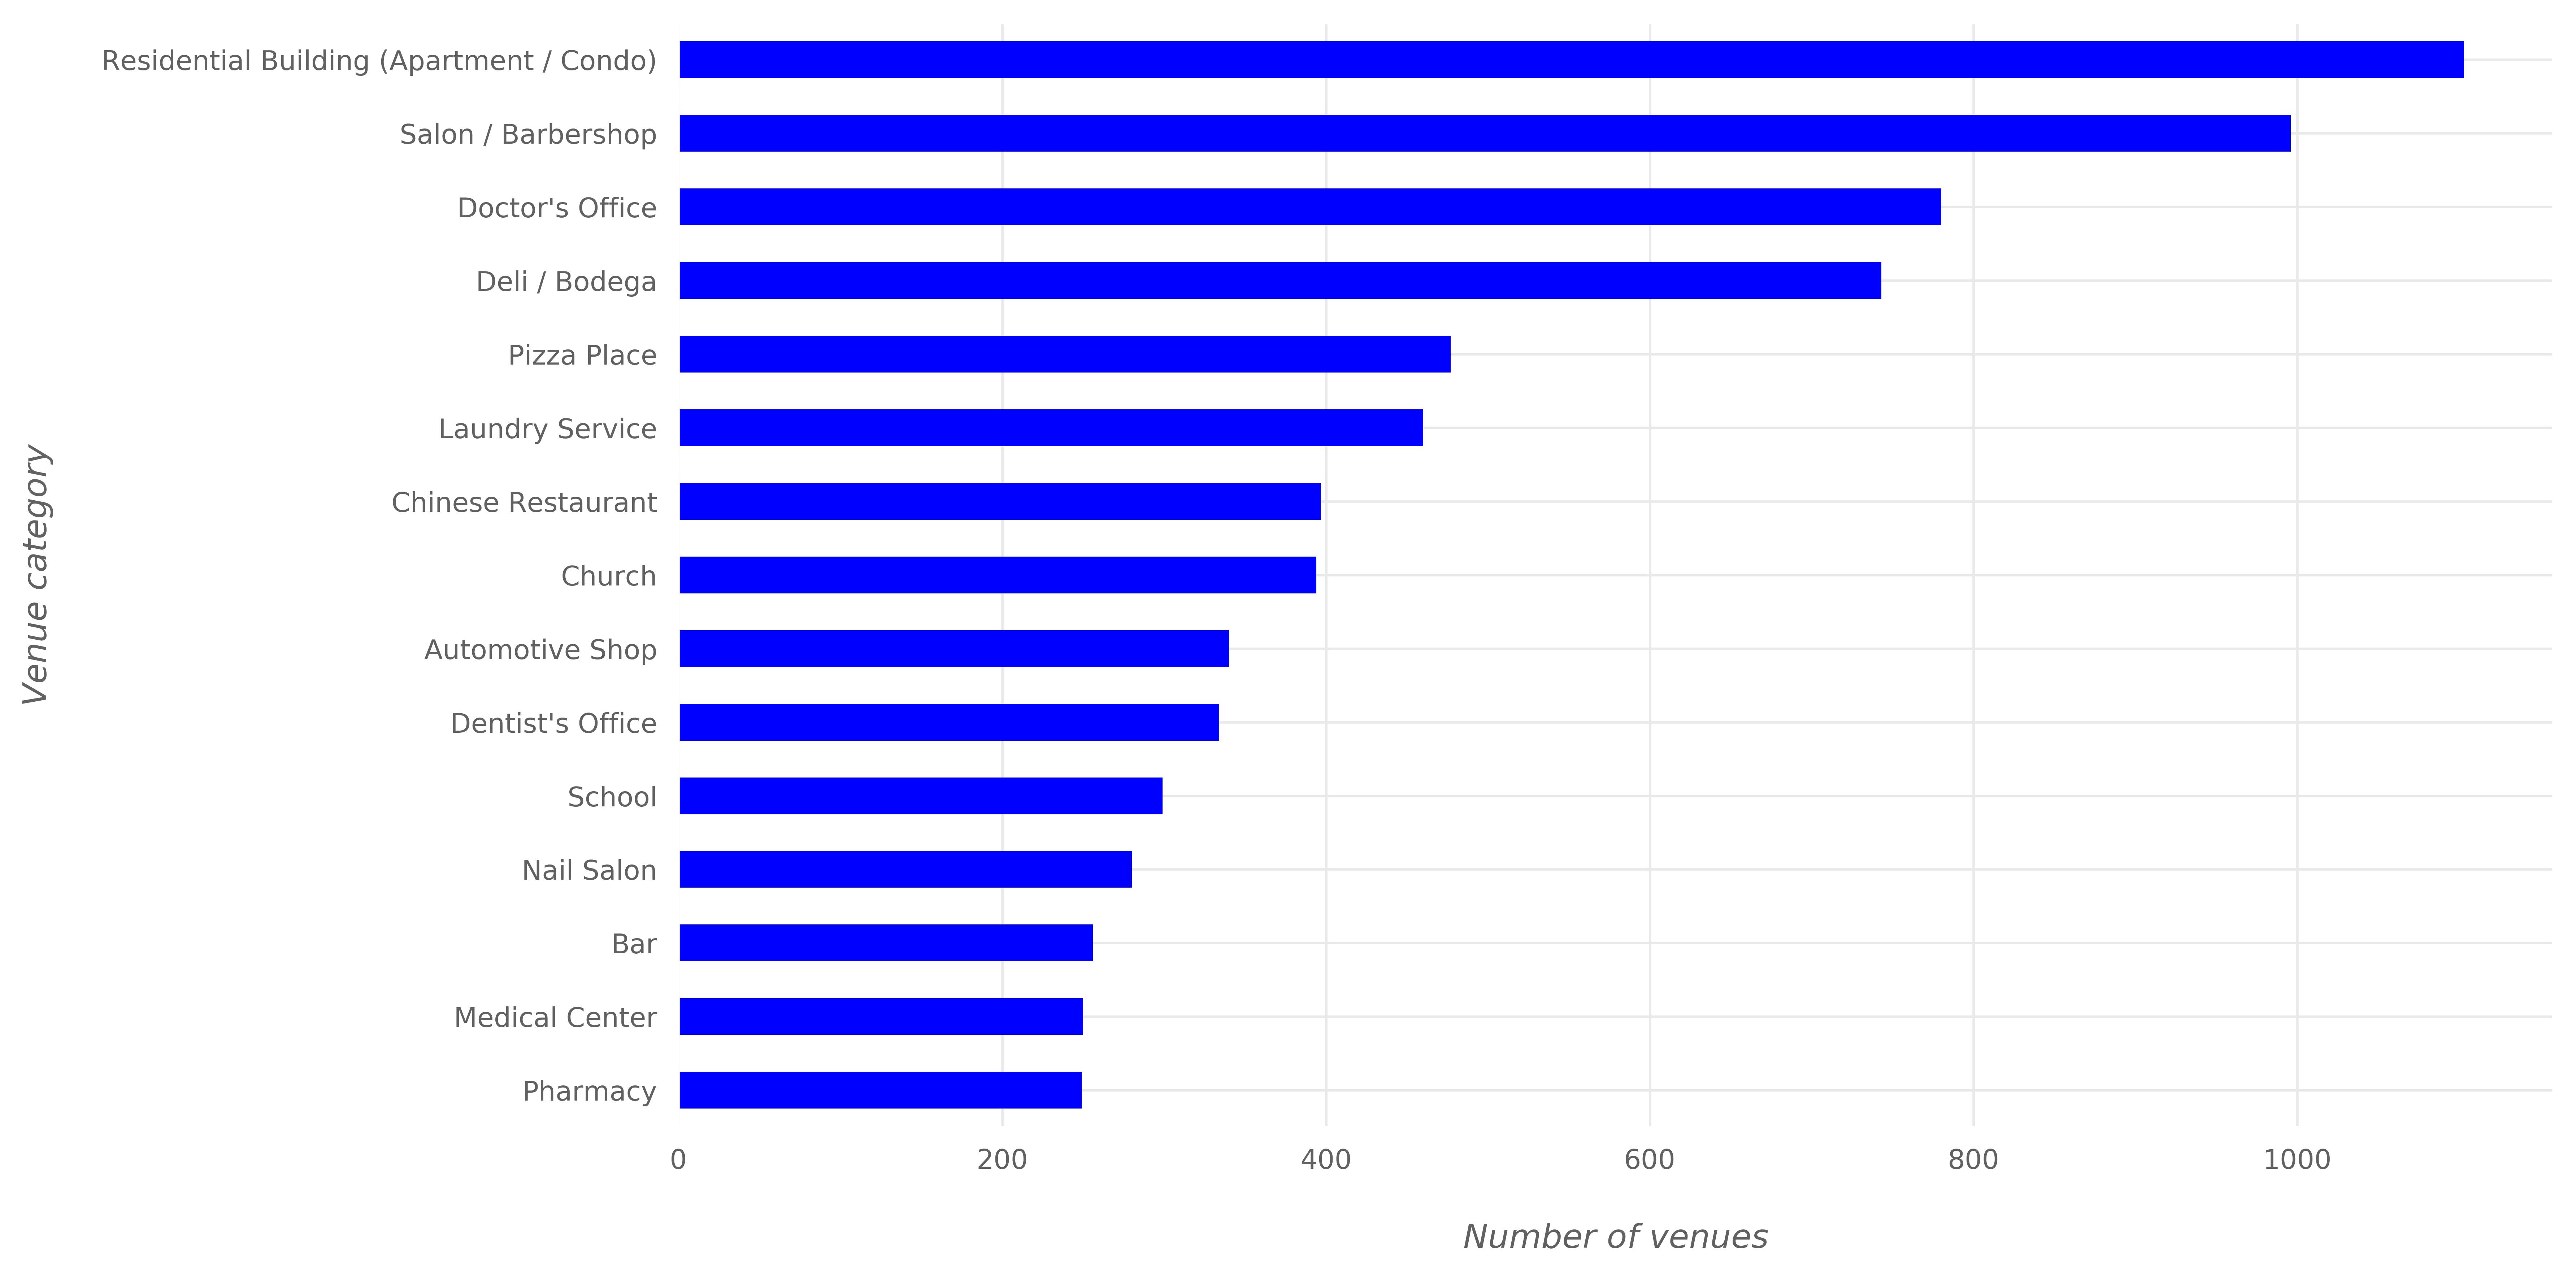

In [78]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
nyc_top_vc = nyc_venues['Venue Category'].value_counts(normalize=False)
ax = nyc_top_vc.head(15).plot(kind='barh', color='blue');
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common-ven-nyc.png', dpi=300)

<b>Most Common Venue Categories in Toronto</b>

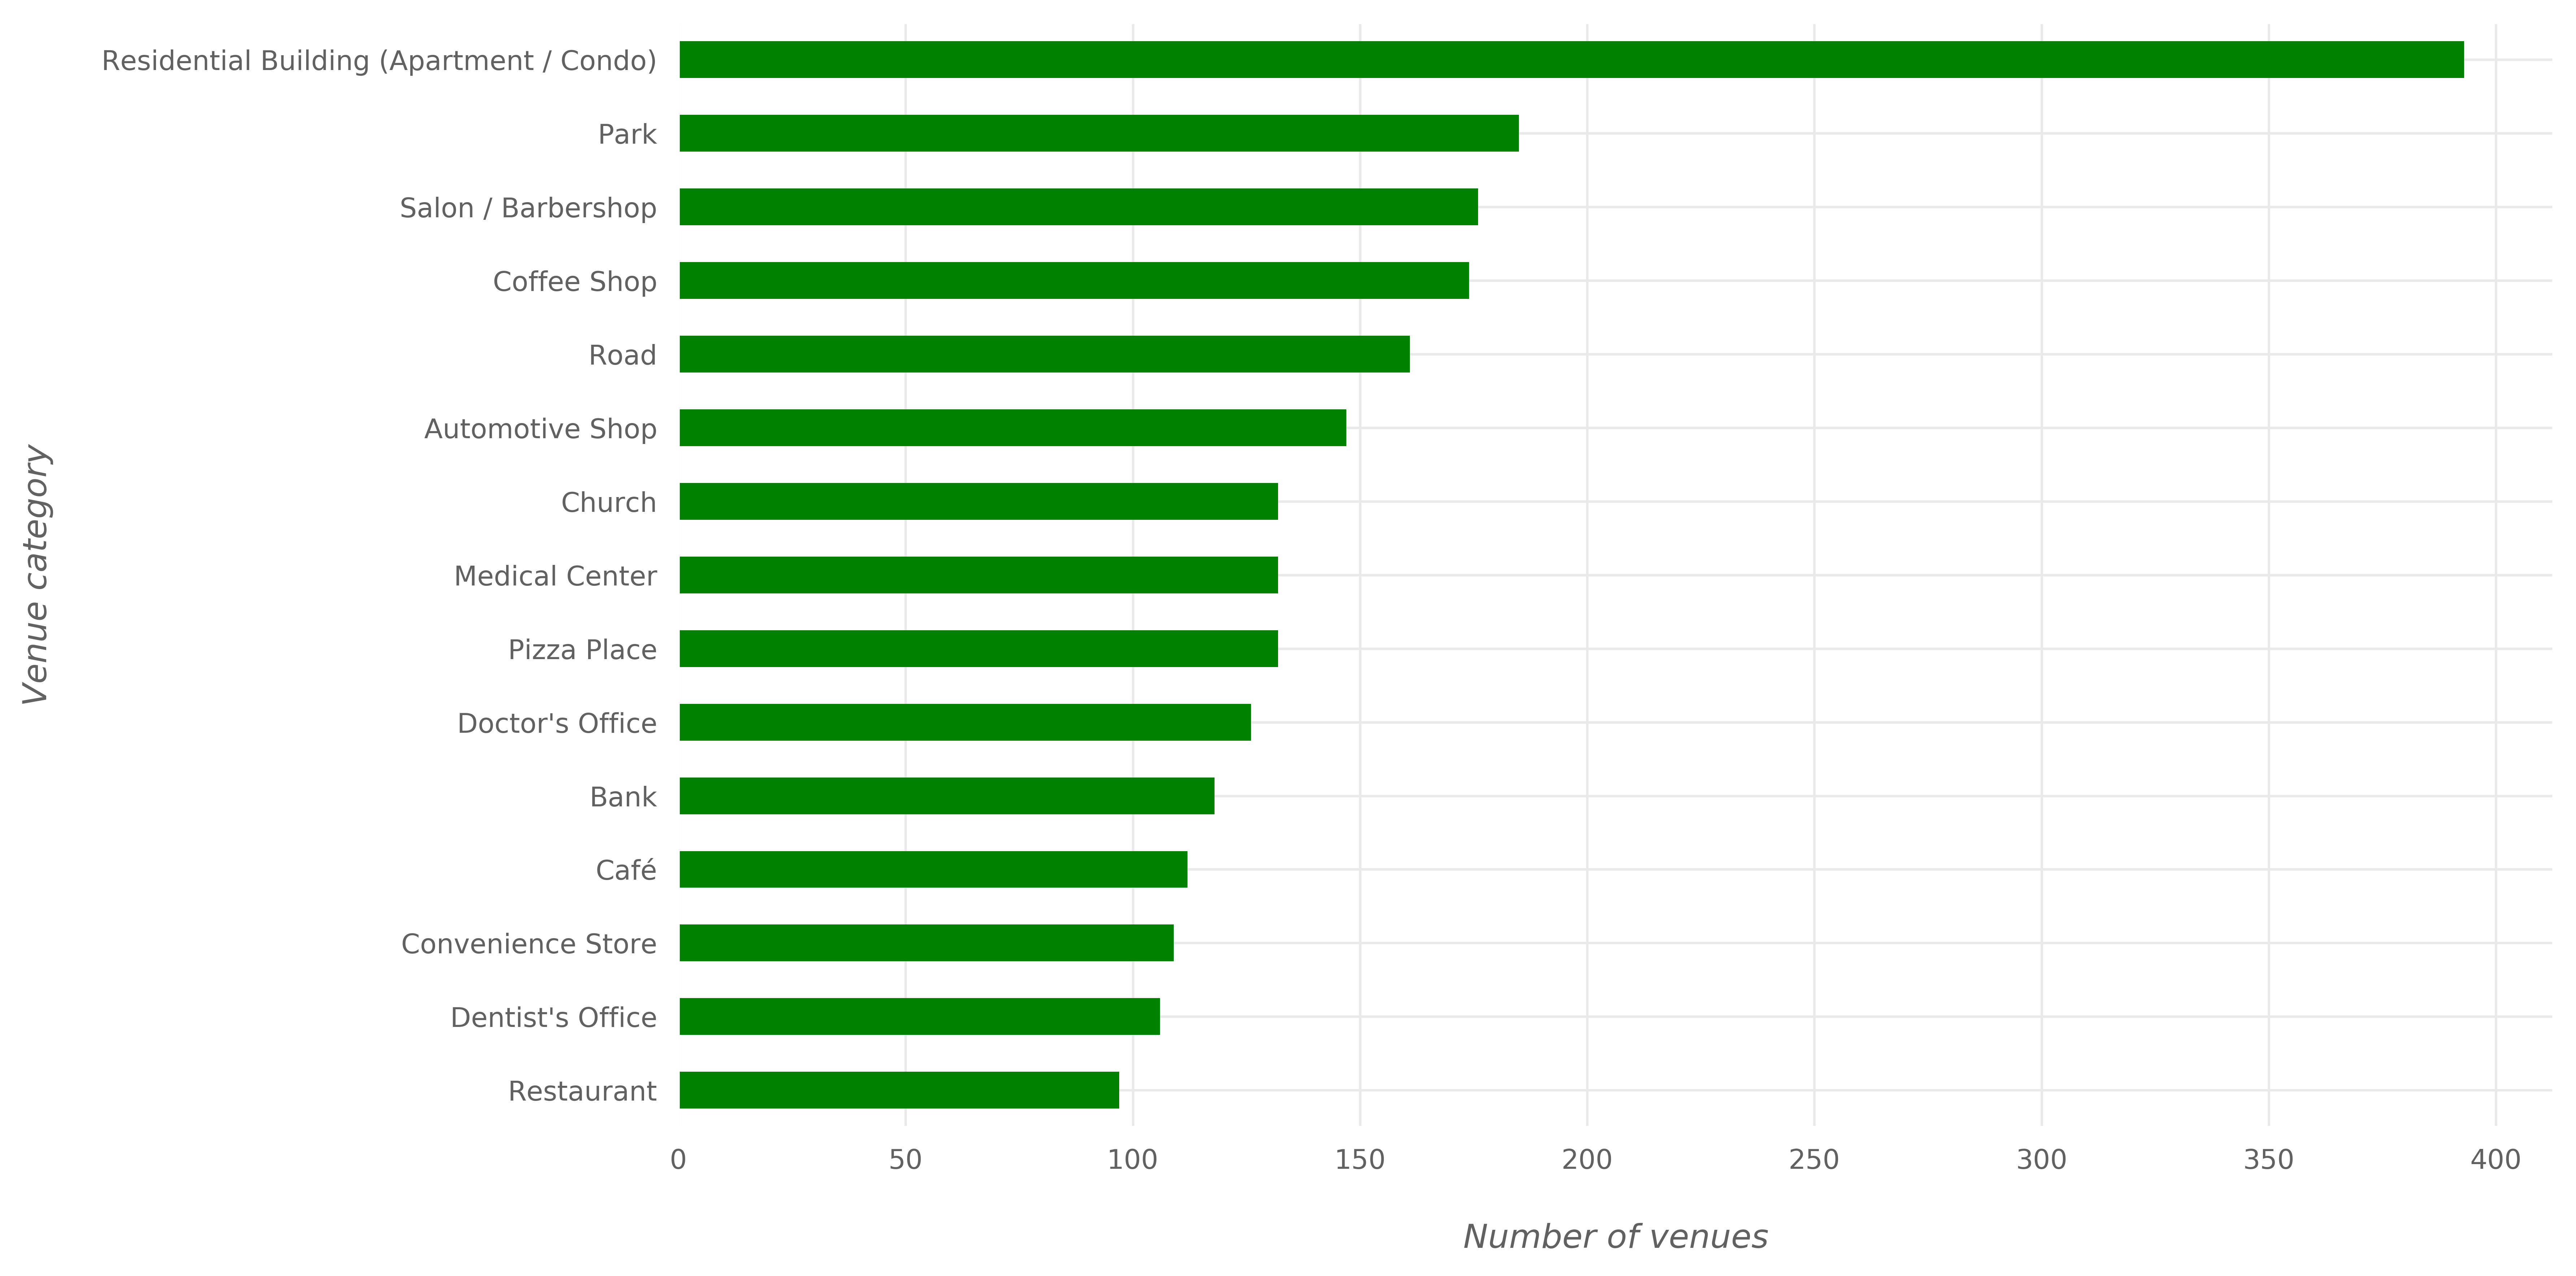

In [79]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
tor_top_vc = tor_venues['Venue Category'].value_counts(normalize=False)
ax = tor_top_vc.head(15).plot(kind='barh', color='green');
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common-ven-tor.png', dpi=300)

<b>Which Venue Categories Exist in More NYC Neighborhoods?</b>

302 neighborhoods in NYC


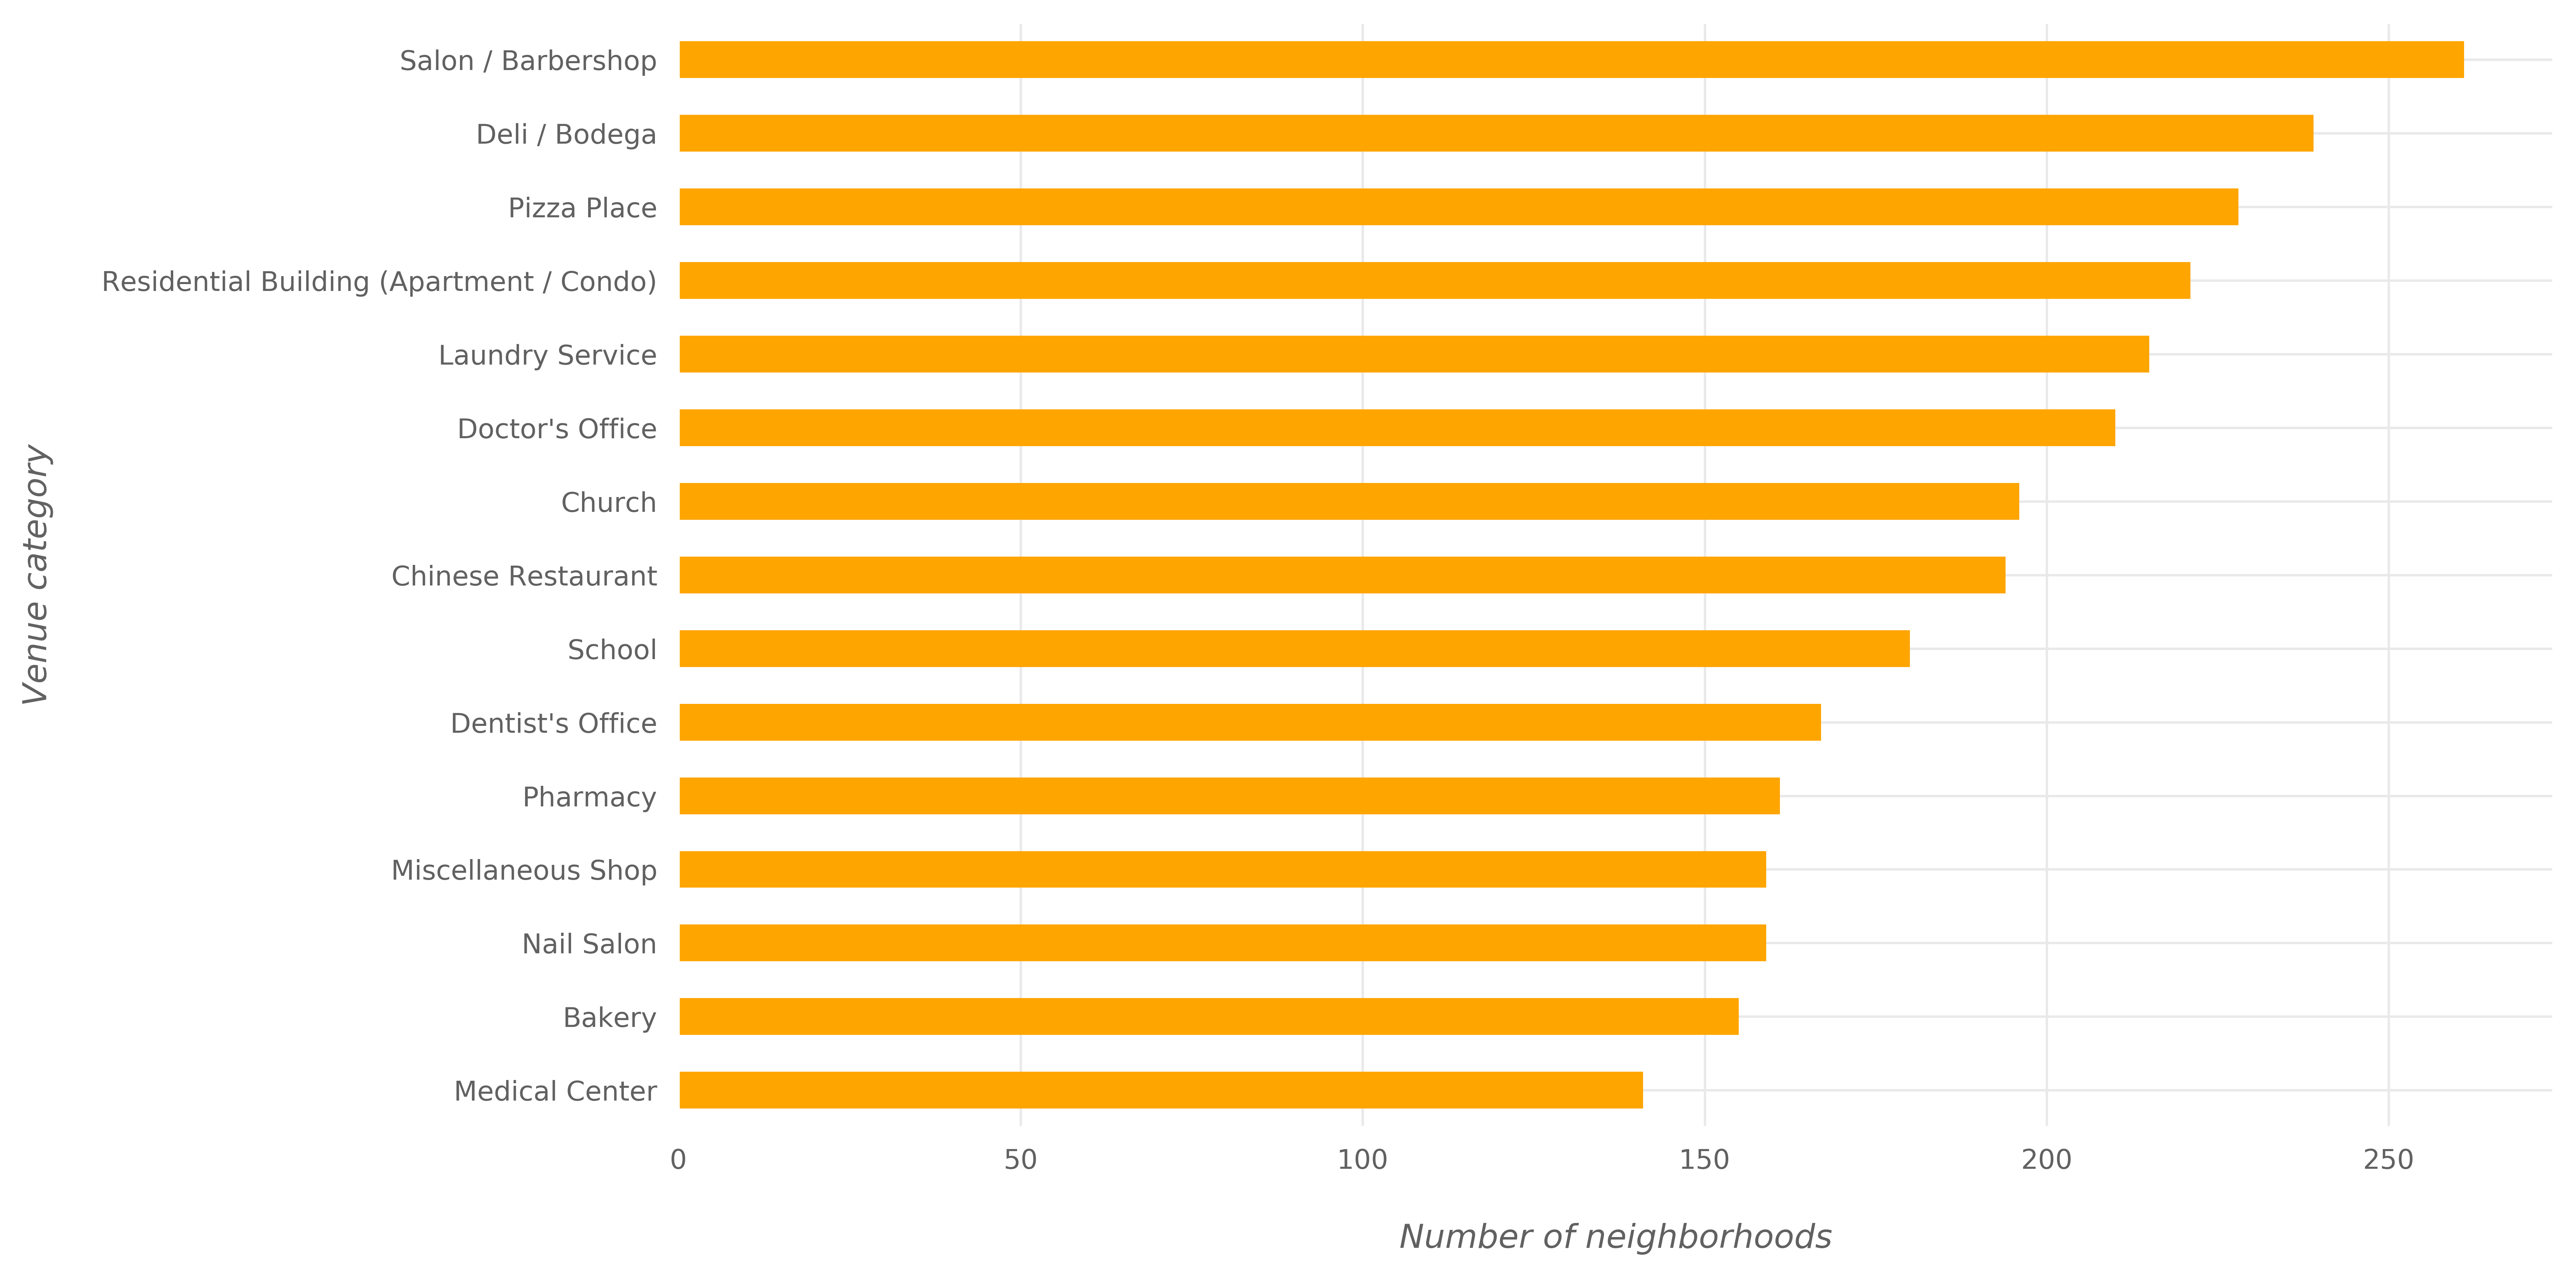

In [80]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
nyc_g = nyc_onehot.groupby('Neighborhood_').max().reset_index()
nyc_p = nyc_g.drop('Neighborhood_', axis=1).sum().sort_values(ascending=False)
print("{} neighborhoods in NYC".format(nyc_g.shape[0]))
ax = nyc_p.head(15).plot(kind='barh', color='orange');
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of neighborhoods', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common2-ven-nyc.png', dpi=300)

<b>Which Venue Categories Exist in More Toronto Neighborhoods?</b>

103 neighborhoods in Toronto


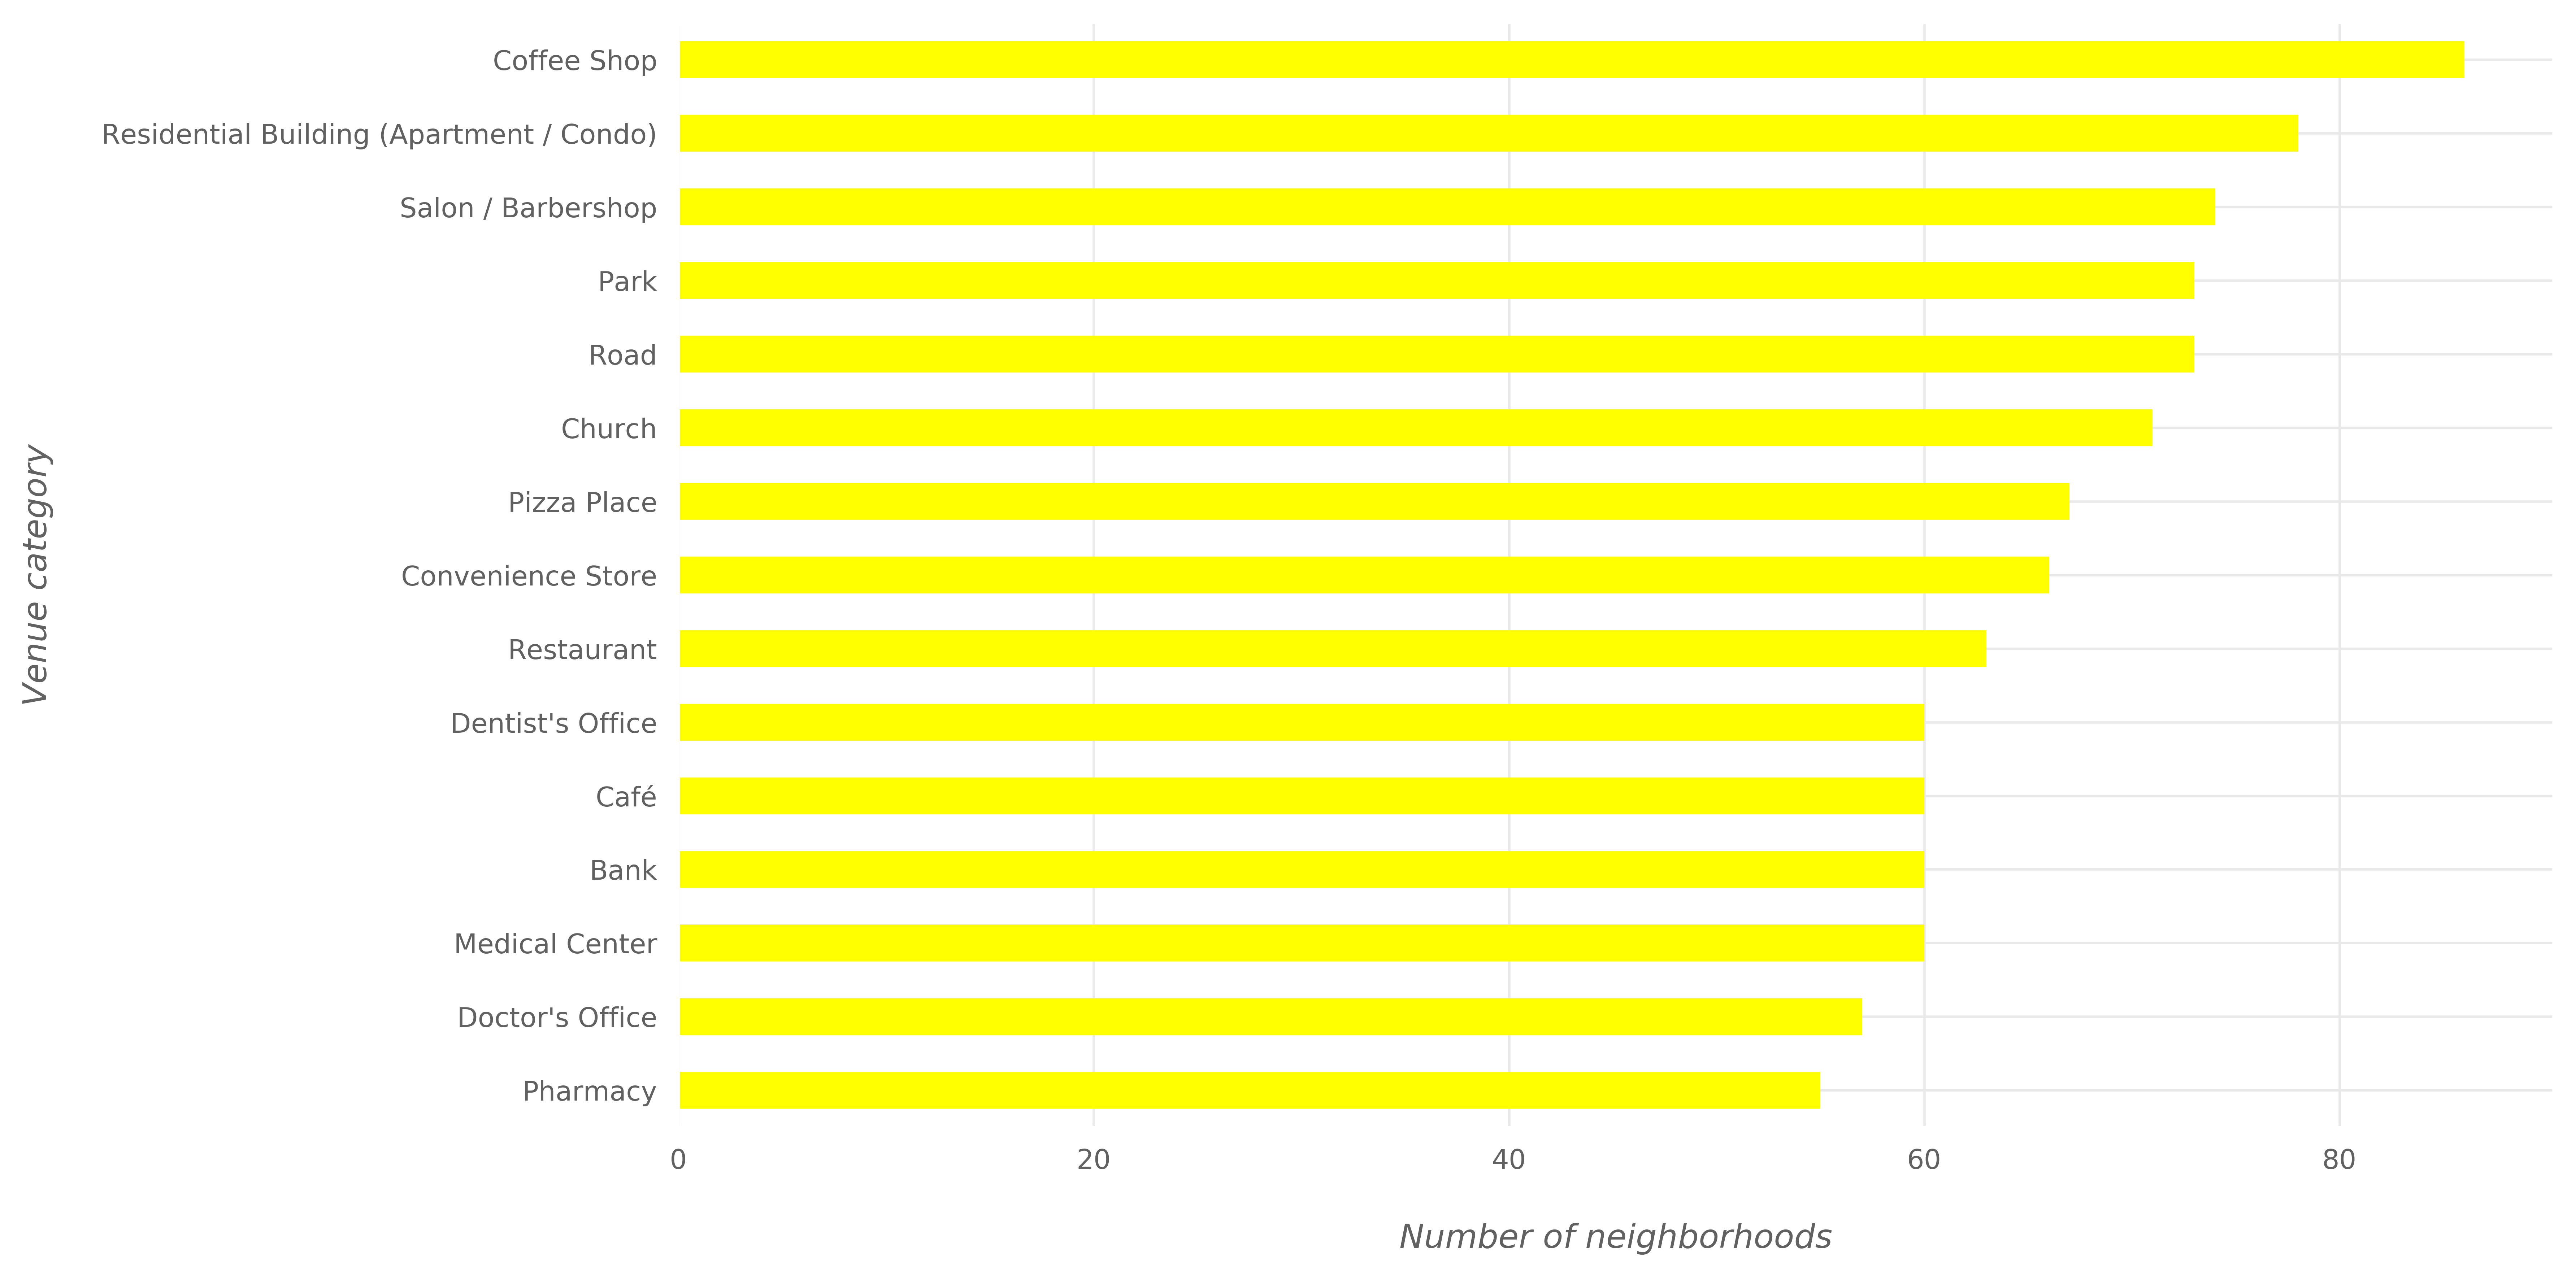

In [81]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
tor_g = tor_onehot.groupby('Neighborhood_').max().reset_index()
tor_p = tor_g.drop('Neighborhood_', axis=1).sum().sort_values(ascending=False)
print("{} neighborhoods in Toronto".format(tor_g.shape[0]))
ax = tor_p.head(15).plot(kind='barh', color='yellow');
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of neighborhoods', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common2-ven-tor.png', dpi=300)

<b>Rare Categories in NYC</b>

In [82]:
nyc_bot_vc = nyc_venues['Venue Category'].value_counts(normalize=False)
nyc_bot_vc = nyc_bot_vc.tail(15).to_frame('Count')
nyc_bot_vc.index.names = ['Venue Category']
nyc_bot_vc

Count
Venue Category              
Hunan Restaurant           1
Street Fair                1
Yemeni Restaurant          1
Romanian Restaurant        1
Cheese Shop                1
Sausage Shop               1
Sporting Event             1
Egyptian Restaurant        1
College Math Building      1
Adult Boutique             1
Language School            1
Pawn Shop                  1
Organic Grocery            1
Hindu Temple               1
Roller Rink                1

<b>Rare Categories in Toronto</b>

In [83]:
tor_bot_vc = tor_venues['Venue Category'].value_counts(normalize=False)
tor_bot_vc = tor_bot_vc.tail(15).to_frame('Count')
tor_bot_vc.index.names = ['Venue Category']
tor_bot_vc

Count
Venue Category                   
Outdoor Sculpture               1
Big Box Store                   1
Creperie                        1
Language School                 1
Modern European Restaurant      1
River                           1
Cantonese Restaurant            1
Hindu Temple                    1
Ethiopian Restaurant            1
College Quad                    1
Tapas Restaurant                1
Pastry Shop                     1
Locksmith                       1
Drugstore                       1
Herbs & Spices Store            1

In [84]:
clmns_nyc_only = set(nyc_grouped.columns).difference(set(tor_grouped.columns))
clmns_tor_only = set(tor_grouped.columns).difference(set(nyc_grouped.columns))

In [85]:
nyc_grouped_ = nyc_grouped.copy()
nyc_grouped_['Neighborhood_'] = nyc_grouped_['Neighborhood_'].apply(lambda x: x + '_NYC')
tor_grouped_ = tor_grouped.copy()
tor_grouped_['Neighborhood_'] = tor_grouped_['Neighborhood_'].apply(lambda x: x + '_Toronto')

for c in clmns_tor_only:
    nyc_grouped_[c] = 0
for c in clmns_nyc_only:
    tor_grouped_[c] = 0
    
all_clmns_sorted = ['Neighborhood_'] + sorted(list(nyc_grouped_.drop('Neighborhood_', axis=1).columns), key=str.lower)
nyc_grouped_ = nyc_grouped_[all_clmns_sorted]
tor_grouped_ = tor_grouped_[all_clmns_sorted]
    
nyc_tor_grouped = pd.concat([nyc_grouped_, tor_grouped_]).reset_index(drop=True)

In [86]:
nyc_tor_grouped.loc[303:308,]

Neighborhood_  Accessories Store  \
303                                  Agincourt_Toronto                0.0   
304  Agincourt North, L'Amoreaux East, Milliken, St...                0.0   
305  Albion Gardens, Beaumond Heights, Humbergate, ...                0.0   
306                     Alderwood, Long Branch_Toronto                0.0   
307  Bathurst Manor, Downsview North, Wilson Height...                0.0   
308                            Bayview Village_Toronto                0.0   

     Acupuncturist  Adult Boutique  Advertising Agency  Afghan Restaurant  \
303       0.000000             0.0                 0.0                0.0   
304       0.000000             0.0                 0.0                0.0   
305       0.000000             0.0                 0.0                0.0   
306       0.000000             0.0                 0.0                0.0   
307       0.000000             0.0                 0.0                0.0   
308       0.012195             0.0                 0.0                0.0   

     African Restaurant  Airport  Airport Food Court  Airport Gate  \
303                 0.0      0.0                 0.0           0.0   
304                 0.0      0.0                 0.0           0.0   
305                 0.0      0.0                 0.0           0.0   
306                 0.0      0.0                 0.0           0.0   
307                 0.0      0.0                 0.0           0.0   
308                 0.0      0.0                 0.0           0.0   

     Airport Lounge  Airport Service  Airport Terminal  Airport Tram  \
303             0.0              0.0               0.0           0.0   
304             0.0              0.0               0.0           0.0   
305             0.0              0.0               0.0           0.0   
306             0.0              0.0               0.0           0.0   
307             0.0              0.0               0.0           0.0   
308             0.0              0.0               0.0           0.0   

     Alternative Healer  American Restaurant  Animal Shelter  Antique Shop  \
303                 0.0                  0.0             0.0           0.0   
304                 0.0                  0.0             0.0           0.0   
305                 0.0                  0.0             0.0           0.0   
306                 0.0                  0.0             0.0           0.0   
307                 0.0                  0.0             0.0           0.0   
308                 0.0                  0.0             0.0           0.0   

       Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
303  0.012987               0.0                     0.0     0.000000   
304  0.000000               0.0                     0.0     0.000000   
305  0.000000               0.0                     0.0     0.061224   
306  0.000000               0.0                     0.0     0.000000   
307  0.000000               0.0                     0.0     0.000000   
308  0.000000               0.0                     0.0     0.000000   

     Art Museum  Art Studio  Arts & Crafts Store  Arts & Entertainment  \
303         0.0    0.000000             0.000000                   0.0   
304         0.0    0.000000             0.016393                   0.0   
305         0.0    0.000000             0.000000                   0.0   
306         0.0    0.011905             0.000000                   0.0   
307         0.0    0.000000             0.000000                   0.0   
308         0.0    0.000000             0.000000                   0.0   

     Asian Restaurant  Assisted Living  Astrologer  Athletics & Sports  ATM  \
303          0.000000              0.0         0.0            0.012987  0.0   
304          0.032787              0.0         0.0            0.000000  0.0   
305          0.000000              0.0         0.0            0.000000  0.0   
306          0.023810              0.0         0.0            0.011905  0.0   

In [87]:
nyc_tor_grouped.shape

(405, 628)

In [88]:
# obtaining the most popular categories for each neighborhood
nyc_tor_neighborhoods_categories_sorted = pd.DataFrame(columns=columns)
nyc_tor_neighborhoods_categories_sorted['Neighborhood_'] = nyc_tor_grouped['Neighborhood_']

for ind in np.arange(nyc_tor_grouped.shape[0]):
    nyc_tor_neighborhoods_categories_sorted.iloc[ind, 1:] = return_most_common_venues(
        nyc_tor_grouped.iloc[ind, :], num_top_cat)

nyc_tor_neighborhoods_categories_sorted.head()

Neighborhood_     1st Most Common Category  \
0       Allerton_NYC           Salon / Barbershop   
1       Annadale_NYC                  Pizza Place   
2  Arden Heights_NYC  Professional & Other Places   
3      Arlington_NYC  Professional & Other Places   
4       Arrochar_NYC                Deli / Bodega   

                   2nd Most Common Category 3rd Most Common Category  \
0                           Laundry Service              Gas Station   
1                        Salon / Barbershop               Nail Salon   
2                                      Pool          Doctor's Office   
3  Residential Building (Apartment / Condo)       Salon / Barbershop   
4                           Doctor's Office              Pizza Place   

  4th Most Common Category 5th Most Common Category 6th Most Common Category  \
0               Non-Profit                 Pharmacy              Pizza Place   
1            Tattoo Parlor      American Restaurant                Pet Store   
2         Dentist's Office                      Bar                      Gym   
3            Deli / Bodega           Hardware Store                   Church   
4               Food Truck              Event Space               Bagel Shop   

  7th Most Common Category  
0            Deli / Bodega  
1                     Pool  
2       Mexican Restaurant  
3      American Restaurant  
4       Salon / Barbershop

<b>Most Common Venue Categories in both NYC and Toronto</b>
<br>
<b>Rare Categories in both NYC and Toronto</b>

In [89]:
nyc_tor_bot_vc = pd.concat([nyc_venues, tor_venues])['Venue Category'].value_counts(normalize=False)
nyc_tor_bot_vc = nyc_tor_bot_vc.tail(15).to_frame('Count')
nyc_tor_bot_vc.index.names = ['Venue Category']
nyc_tor_bot_vc

Count
Venue Category                 
English Restaurant            1
Dosa Place                    1
Leather Goods Store           1
Stoop Sale                    1
Colombian Restaurant          1
Night Market                  1
Corporate Amenity             1
Israeli Restaurant            1
College History Building      1
Laser Tag                     1
Egyptian Restaurant           1
Public Bathroom               1
Sporting Event                1
Botanical Garden              1
Perfume Shop                  1

<h3>Clustering</h3>

In [90]:
# the number of clusters
kclusters = 5

nyc_tor_grouped_clustering = nyc_tor_grouped.drop('Neighborhood_', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 0, 0, 0, 0, 4, 3, 1, 3], dtype=int32)

In [91]:
# add clustering labels
nyc_tor_neighborhoods_categories_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# nyc_tor_merged = nyc_tor_neighborhoods.rename(columns={'Neighborhood': 'Neighborhood_'}).copy()
# tor_merged = tor_merged[~tor_merged['Neighborhood_'].isin(tor_excluded_neighborhoods)]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyc_tor_merged = nyc_tor_neighborhoods_categories_sorted.set_index('Neighborhood_')

nyc_tor_merged.iloc[300:310] # check the last columns!

Cluster Labels  \
Neighborhood_                                                        
Woodside_NYC                                                     3   
Yorkville_NYC                                                    4   
Adelaide, King, Richmond_Toronto                                 0   
Agincourt_Toronto                                                1   
Agincourt North, L'Amoreaux East, Milliken, Ste...               0   
Albion Gardens, Beaumond Heights, Humbergate, J...               3   
Alderwood, Long Branch_Toronto                                   0   
Bathurst Manor, Downsview North, Wilson Heights...               2   
Bayview Village_Toronto                                          0   
Bedford Park, Lawrence Manor East_Toronto                        0   

                                                                    1st Most Common Category  \
Neighborhood_                                                                                  
Woodside_NYC                                                                             Bar   
Yorkville_NYC                                       Residential Building (Apartment / Condo)   
Adelaide, King, Richmond_Toronto                                                        Café   
Agincourt_Toronto                                                            Automotive Shop   
Agincourt North, L'Amoreaux East, Milliken, Ste...                                    School   
Albion Gardens, Beaumond Heights, Humbergate, J...                        Salon / Barbershop   
Alderwood, Long Branch_Toronto                                                          Bank   
Bathurst Manor, Downsview North, Wilson Heights...  Residential Building (Apartment / Condo)   
Bayview Village_Toronto                             Residential Building (Apartment / Condo)   
Bedford Park, Lawrence Manor East_Toronto                                 Salon / Barbershop   

                                                   2nd Most Common Category  \
Neighborhood_                                                                 
Woodside_NYC                                             Salon / Barbershop   
Yorkville_NYC                                               Laundry Service   
Adelaide, King, Richmond_Toronto                                Coffee Shop   
Agincourt_Toronto                                        Chinese Restaurant   
Agincourt North, L'Amoreaux East, Milliken, Ste...       Chinese Restaurant   
Albion Gardens, Beaumond Heights, Humbergate, J...            Movie Theater   
Alderwood, Long Branch_Toronto                                          Pub   
Bathurst Manor, Downsview North, Wilson Heights...          Doctor's Office   
Bayview Village_Toronto                                              Church   
Bedford Park, Lawrence Manor East_Toronto                Italian Restaurant   

                                                   3rd Most Common Category  \
Neighborhood_                                                                 
Woodside_NYC                                             Mexican Restaurant   
Yorkville_NYC                                                           Spa   
Adelaide, King, Richmond_Toronto                                 Food Court   
Agincourt_Toronto                                           Doctor's Office   
Agincourt North, L'Amoreaux East, Milliken, Ste...                     Road   
Albion Gardens, Beaumond Heights, Humbergate, J...              Pizza Place   
Alderwood, Long Branch_Toronto                                      Daycare   
Bathurst Manor, Downsview North, Wilson Heights...           Medical Center   
Bayview Village_Toronto                                  Salon / Barbershop   
Bedford Park, Lawrence Manor East_Toronto                               Spa   

                                                         4th Most Common Category  \
Neighborhood_                                                              

<b>Examining clusters</b><br>
Let's see the neighborhoods in each of the five clusters:<br>

<b>Cluster 1</b>

In [92]:
c1 = nyc_tor_merged.loc[nyc_tor_merged['Cluster Labels'] == 0, :]
print(c1.shape)
c1.iloc[60:70]

(190, 8)


Cluster Labels  \
Neighborhood_                           
Kew Gardens Hills_NYC               0   
Kingsbridge_NYC                     0   
Lighthouse Hill_NYC                 0   
Lincoln Square_NYC                  0   
Little Italy_NYC                    0   
Long Island City_NYC                0   
Malba_NYC                           0   
Manhattan Beach_NYC                 0   
Manhattanville_NYC                  0   
Manor Heights_NYC                   0   

                                       1st Most Common Category  \
Neighborhood_                                                     
Kew Gardens Hills_NYC                                      Bank   
Kingsbridge_NYC                                 Laundry Service   
Lighthouse Hill_NYC                          Salon / Barbershop   
Lincoln Square_NYC                                      Theater   
Little Italy_NYC                             Italian Restaurant   
Long Island City_NYC   Residential Building (Apartment / Condo)   
Malba_NYC                                            Nail Salon   
Manhattan Beach_NYC                               Boat or Ferry   
Manhattanville_NYC     Residential Building (Apartment / Condo)   
Manor Heights_NYC                               Doctor's Office   

                      2nd Most Common Category  \
Neighborhood_                                    
Kew Gardens Hills_NYC          Doctor's Office   
Kingsbridge_NYC             Salon / Barbershop   
Lighthouse Hill_NYC         Italian Restaurant   
Lincoln Square_NYC                 High School   
Little Italy_NYC            Salon / Barbershop   
Long Island City_NYC             Deli / Bodega   
Malba_NYC                      Coworking Space   
Manhattan Beach_NYC            Harbor / Marina   
Manhattanville_NYC               Deli / Bodega   
Manor Heights_NYC              Laundry Service   

                              3rd Most Common Category  \
Neighborhood_                                            
Kew Gardens Hills_NYC                 Dentist's Office   
Kingsbridge_NYC                     Miscellaneous Shop   
Lighthouse Hill_NYC                               Park   
Lincoln Square_NYC               Performing Arts Venue   
Little Italy_NYC                          Gourmet Shop   
Long Island City_NYC               Government Building   
Malba_NYC                                 Trade School   
Manhattan Beach_NYC                 Turkish Restaurant   
Manhattanville_NYC     College Administrative Building   
Manor Heights_NYC                           Donut Shop   

                      4th Most Common Category 5th Most Common Category  \
Neighborhood_                                                             
Kew Gardens Hills_NYC        Convenience Store                   School   
Kingsbridge_NYC                       Boutique                     Bank   
Lighthouse Hill_NYC         Miscellaneous Shop                   Church   
Lincoln Square_NYC                       Plaza              Opera House   
Little Italy_NYC                     Gift Shop        Accessories Store   
Long Island City_NYC               Pizza Place           Sandwich Place   
Malba_NYC                                 Park        Martial Arts Dojo   
Manhattan Beach_NYC               Dessert Shop     Other Great Outdoors   
Manhattanville_NYC                  University                     Bank   
Manor Heights_NYC                 Liquor Store       Miscellaneous Shop   

                                       6th Most Common Category  \
Neighborhood_                                                     
Kew Gardens Hills_NYC                            Emergency Room   
Kingsbridge_NYC                              Seafood Restaurant   
Lighthouse Hill_NYC                                      School   
Lincoln Square_NYC     Residential Building (Apartment / Condo)   
Little Italy_NYC                                         Bakery   
Long Island City_NYC                                Coffe

Most common categories among all neighborhoods in this cluster:
<br>
<b>Cluster 2</b>

In [93]:
c2 = nyc_tor_merged.loc[nyc_tor_merged['Cluster Labels'] == 1, :]
print(c2.shape)
c2

(36, 8)


Cluster Labels  \
Neighborhood_                                                        
Auburndale_NYC                                                   1   
Blissville_NYC                                                   1   
Bloomfield_NYC                                                   1   
Broadway Junction_NYC                                            1   
Clifton_NYC                                                      1   
College Point_NYC                                                1   
Eastchester_NYC                                                  1   
Gravesend_NYC                                                    1   
Howland Hook_NYC                                                 1   
Hunts Point_NYC                                                  1   
Longwood_NYC                                                     1   
Mariner's Harbor_NYC                                             1   
Mount Eden_NYC                                                   1   
Port Ivory_NYC                                                   1   
Port Richmond_NYC                                                1   
Somerville_NYC                                                   1   
South Jamaica_NYC                                                1   
South Ozone Park_NYC                                             1   
Springfield Gardens_NYC                                          1   
Steinway_NYC                                                     1   
Travis_NYC                                                       1   
Utopia_NYC                                                       1   
Agincourt_Toronto                                                1   
Clarks Corners, Sullivan, Tam O'Shanter_Toronto                  1   
Dorset Park, Scarborough Town Centre, Wexford H...               1   
Dovercourt Village, Dufferin_Toronto                             1   
Flemingdon Park, Don Mills South_Toronto                         1   
Harbourfront_Toronto                                             1   
Highland Creek, Rouge Hill, Port Union_Toronto                   1   
Humber Summit_Toronto                                            1   
Kingsway Park South West, Mimico NW, The Queens...               1   
Northwest_Toronto                                                1   
Northwood Park, York University_Toronto                          1   
Rouge, Malvern_Toronto                                           1   
Scarborough Village_Toronto                                      1   
The Junction North, Runnymede_Toronto                            1   

                                                                    1st Most Common Category  \
Neighborhood_                                                                                  
Auburndale_NYC                                                               Automotive Shop   
Blissville_NYC                                                                   Gas Station   
Bloomfield_NYC                                                               Automotive Shop   
Broadway Junction_NYC                                                            High School   
Clifton_NYC                                                                      Gas Station   
College Point_NYC                                                            Automotive Shop   
Eastchester_NYC                                                              Automotive Shop   
Gravesend_NYC                                                                Automotive Shop   
Howland Hook_NYC                                                                        Food   
Hunts Point_NYC                                                              Automotive Shop   
Longwood_NYC                                                                     Pizza Place   
Mariner's Harbor_NYC                                                         Automotive Shop   
Mount Eden_NYC                                 

<b>Cluster 3</b>

In [94]:
c3 = nyc_tor_merged.loc[nyc_tor_merged['Cluster Labels'] == 2, :]
print(c3.shape)
c3

(45, 8)


Cluster Labels  \
Neighborhood_                                                        
Bay Terrace_NYC                                                  2   
Bergen Beach_NYC                                                 2   
Bronxdale_NYC                                                    2   
Brooklyn Heights_NYC                                             2   
Bulls Head_NYC                                                   2   
Castleton Corners_NYC                                            2   
Concord_NYC                                                      2   
Dongan Hills_NYC                                                 2   
Dyker Heights_NYC                                                2   
Egbertville_NYC                                                  2   
Emerson Hill_NYC                                                 2   
Forest Hills_NYC                                                 2   
Fort Hamilton_NYC                                                2   
Georgetown_NYC                                                   2   
Glendale_NYC                                                     2   
Gramercy_NYC                                                     2   
Greenridge_NYC                                                   2   
Heartland Village_NYC                                            2   
Holliswood_NYC                                                   2   
Kew Gardens_NYC                                                  2   
Lindenwood_NYC                                                   2   
Madison_NYC                                                      2   
Manhattan Terrace_NYC                                            2   
Midwood_NYC                                                      2   
Morris Park_NYC                                                  2   
Murray Hill_NYC                                                  2   
New Springville_NYC                                              2   
Norwood_NYC                                                      2   
Oakwood_NYC                                                      2   
Ocean Parkway_NYC                                                2   
Park Hill_NYC                                                    2   
Pelham Gardens_NYC                                               2   
Pelham Parkway_NYC                                               2   
Pomonok_NYC                                                      2   
Randall Manor_NYC                                                2   
Rego Park_NYC                                                    2   
Rockaway Park_NYC                                                2   
Schuylerville_NYC                                                2   
South Beach_NYC                                                  2   
Starrett City_NYC                                                2   
Todt Hill_NYC                                                    2   
Tudor City_NYC                                                   2   
Upper East Side_NYC                                              2   
Bathurst Manor, Downsview North, Wilson Heights...               2   
Roselawn_Toronto                                                 2   

                                                                    1st Most Common Category  \
Neighborhood_                                                                                  
Bay Terrace_NYC                                     Residential Building (Apartment / Condo)   
Bergen Beach_NYC                                                             Doctor's Office   
Bronxdale_NYC                                       Residential Building (Apartment / Condo)   
Brooklyn Heights_NYC                                                         Doctor's Office   
Bulls Head_NYC                                                               Doctor's Office   
Castleton Corners_NYC                                                        Doctor's Off

<b>Cluster 4</b>

In [95]:
c4 = nyc_tor_merged.loc[nyc_tor_merged['Cluster Labels'] == 3, :]
print(c4.shape)
c4

(86, 8)


Cluster Labels  \
Neighborhood_                                                        
Allerton_NYC                                                     3   
Annadale_NYC                                                     3   
Astoria Heights_NYC                                              3   
Bath Beach_NYC                                                   3   
Bay Ridge_NYC                                                    3   
Bedford Stuyvesant_NYC                                           3   
Beechhurst_NYC                                                   3   
Bellaire_NYC                                                     3   
Bellerose_NYC                                                    3   
Belmont_NYC                                                      3   
Bensonhurst_NYC                                                  3   
Boerum Hill_NYC                                                  3   
Cambria Heights_NYC                                              3   
Canarsie_NYC                                                     3   
Central Harlem_NYC                                               3   
City Line_NYC                                                    3   
Claremont Village_NYC                                            3   
Concourse_NYC                                                    3   
Concourse Village_NYC                                            3   
Corona_NYC                                                       3   
Crown Heights_NYC                                                3   
Cypress Hills_NYC                                                3   
Douglaston_NYC                                                   3   
East Elmhurst_NYC                                                3   
East Flatbush_NYC                                                3   
East New York_NYC                                                3   
East Tremont_NYC                                                 3   
Edenwald_NYC                                                     3   
Elm Park_NYC                                                     3   
Eltingville_NYC                                                  3   
Erasmus_NYC                                                      3   
Far Rockaway_NYC                                                 3   
Flatlands_NYC                                                    3   
Floral Park_NYC                                                  3   
Great Kills_NYC                                                  3   
High  Bridge_NYC                                                 3   
Highland Park_NYC                                                3   
Hollis_NYC                                                       3   
Homecrest_NYC                                                    3   
Inwood_NYC                                                       3   
Jamaica Center_NYC                                               3   
Jamaica Hills_NYC                                                3   
Laurelton_NYC                                                    3   
Little Neck_NYC                                                  3   
Manhattan Valley_NYC                                             3   
Marble Hill_NYC                                                  3   
Maspeth_NYC                                                      3   
Mill Basin_NYC                                                   3   
Morrisania_NYC                                                   3   
Mount Hope_NYC                                                   3   
New Brighton_NYC                                                 3   
New Dorp_NYC                                                     3   
New Lots_NYC                                                     3   
North Corona_NYC                                                 3   
Ocean Hill_NYC                                                   3   
Olinville_NYC                                                 

<b>Cluster 5</b>

In [96]:
c5 = nyc_tor_merged.loc[nyc_tor_merged['Cluster Labels'] == 4, :]
print(c5.shape)
c5

(48, 8)


Cluster Labels  \
Neighborhood_                                                        
Astoria_NYC                                                      4   
Bedford Park_NYC                                                 4   
Briarwood_NYC                                                    4   
Carnegie Hill_NYC                                                4   
Cobble Hill_NYC                                                  4   
Ditmas Park_NYC                                                  4   
East Williamsburg_NYC                                            4   
Elmhurst_NYC                                                     4   
Flatbush_NYC                                                     4   
Forest Hills Gardens_NYC                                         4   
Fort Greene_NYC                                                  4   
Fresh Meadows_NYC                                                4   
Hamilton Heights_NYC                                             4   
Jackson Heights_NYC                                              4   
Kingsbridge Heights_NYC                                          4   
Lefrak City_NYC                                                  4   
Lenox Hill_NYC                                                   4   
Lower East Side_NYC                                              4   
Melrose_NYC                                                      4   
Morris Heights_NYC                                               4   
Mott Haven_NYC                                                   4   
Prospect Heights_NYC                                             4   
Prospect Lefferts Gardens_NYC                                    4   
Prospect Park South_NYC                                          4   
Ravenswood_NYC                                                   4   
Riverdale_NYC                                                    4   
Rochdale_NYC                                                     4   
South Side_NYC                                                   4   
Spuyten Duyvil_NYC                                               4   
Stuyvesant Town_NYC                                              4   
Turtle Bay_NYC                                                   4   
Upper West Side_NYC                                              4   
Washington Heights_NYC                                           4   
West Village_NYC                                                 4   
Yorkville_NYC                                                    4   
Brockton, Exhibition Place, Parkdale Village_To...               4   
Church and Wellesley_Toronto                                     4   
Davisville North_Toronto                                         4   
Deer Park, Forest Hill SE, Rathnelly, South Hil...               4   
Harbourfront East, Toronto Islands, Union Stati...               4   
Humber Bay, King's Mill Park, Kingsway Park Sou...               4   
Parkwoods_Toronto                                                4   
Rosedale_Toronto                                                 4   
Silver Hills, York Mills_Toronto                                 4   
The Annex, North Midtown, Yorkville_Toronto                      4   
Victoria Village_Toronto                                         4   
Willowdale West_Toronto                                          4   
York Mills West_Toronto                                          4   

                                                                    1st Most Common Category  \
Neighborhood_                                                                                  
Astoria_NYC                                         Residential Building (Apartment / Condo)   
Bedford Park_NYC                                    Residential Building (Apartment / Condo)   
Briarwood_NYC                                       Residential Building (Apartment / Condo)   
Carnegie Hill_NYC                                   Residential Buildin

In [104]:
clust_cats = []
clusters = [c1, c2, c3, c4, c5]
for i, clus in enumerate(clusters):
    clust_cats.append([])
    for n in clus.index.values:
        if n.endswith('NYC'):
            nn = n[:-4]
            clust_cats[i].extend(list(nyc_venues[nyc_venues['Neighborhood'] == nn]['Venue Category'].values))
        else:
            nn = n[:-8]
            clust_cats[i].extend(list(tor_venues[tor_venues['Neighborhood'] == nn]['Venue Category'].values))
    clust_cats[i] = pd.Series(clust_cats[i]).value_counts(normalize=True) * 100

In [105]:
tbl_bck = "#363636"
tbl_hdr_bck = "#363636"
tbl_txt = "#BBBBBB"

styles = [
    dict(selector="td", props=[("border", "0px solid #333"), ("padding", "8px 20px 8px 20px"), 
                               ("background", tbl_bck), ("text-align", "left"),
                               ("color", tbl_txt), ("font-size", "10pt")]),
    
    dict(selector="th", props=[("border", "0px solid #333"), ("padding", "8px 20px 8px 20px"), 
                               ("background", tbl_bck), ("text-align", "left"),
                               ("color", tbl_txt), ("font-size", "10pt")]),
    
    dict(selector=".col0", props=[("border-left", "1px solid #bbbbbb")]), 
    
    dict(selector="th.blank:nth-child(2)", props=[("border-left", "1px solid #bbbbbb")]),
    
    dict(selector="thead tr:nth-child(2) th", props=[("padding-top", "0"), ("padding-bottom", "8px")]),
    
    dict(selector="th.col_heading", props=[("background", tbl_hdr_bck), 
                                           ("color", "#FFCA91")]),
    
    dict(selector="th.index_name", props=[("background", tbl_hdr_bck), 
                                          ("color", "#8DCDFF")]),
    
    dict(selector="th.blank", props=[("background", tbl_hdr_bck), ("padding", "0")]),
    
    dict(selector="tr:nth-child(2n)", props=[("background", "white")]),
    
    dict(selector="thead tr:nth-child(2) th", props=[("border-bottom", "1px solid {}".format(tbl_txt))]),
    
    dict(selector="thead tr:nth-child(1) th", props=[("padding-top", "14px !important")]),
    
    dict(selector="tbody tr:last-child td", props=[("padding-bottom", "20px")]),
    
    dict(selector="tbody tr:last-child th", props=[("padding-bottom", "20px")]),
    
    dict(selector="td:hover", props=[("font-weight", "bold"), ("background", "#002b36"), ("color", "#8DCDFF")]),
]

In [107]:
for i in range(kclusters):
    c__ = clust_cats[i].to_frame("% of venues")
    c__.index.names = ['Category']
    html = (c__.head(7).style.set_table_styles(styles)
            .set_table_attributes('style="border-collapse: collapse; border: 2px solid #BBBBBB"'))
    display(HTML("Cluster {}".format(i+1)))
    display(html)

In [108]:
n_counts = []
for c in clusters:
    nyc_c = 0
    tor_c = 0
    for n in c.index.values:
        if n.endswith('NYC'):
            nyc_c += 1
        else:
            tor_c += 1
    n_counts.append((nyc_c, tor_c))

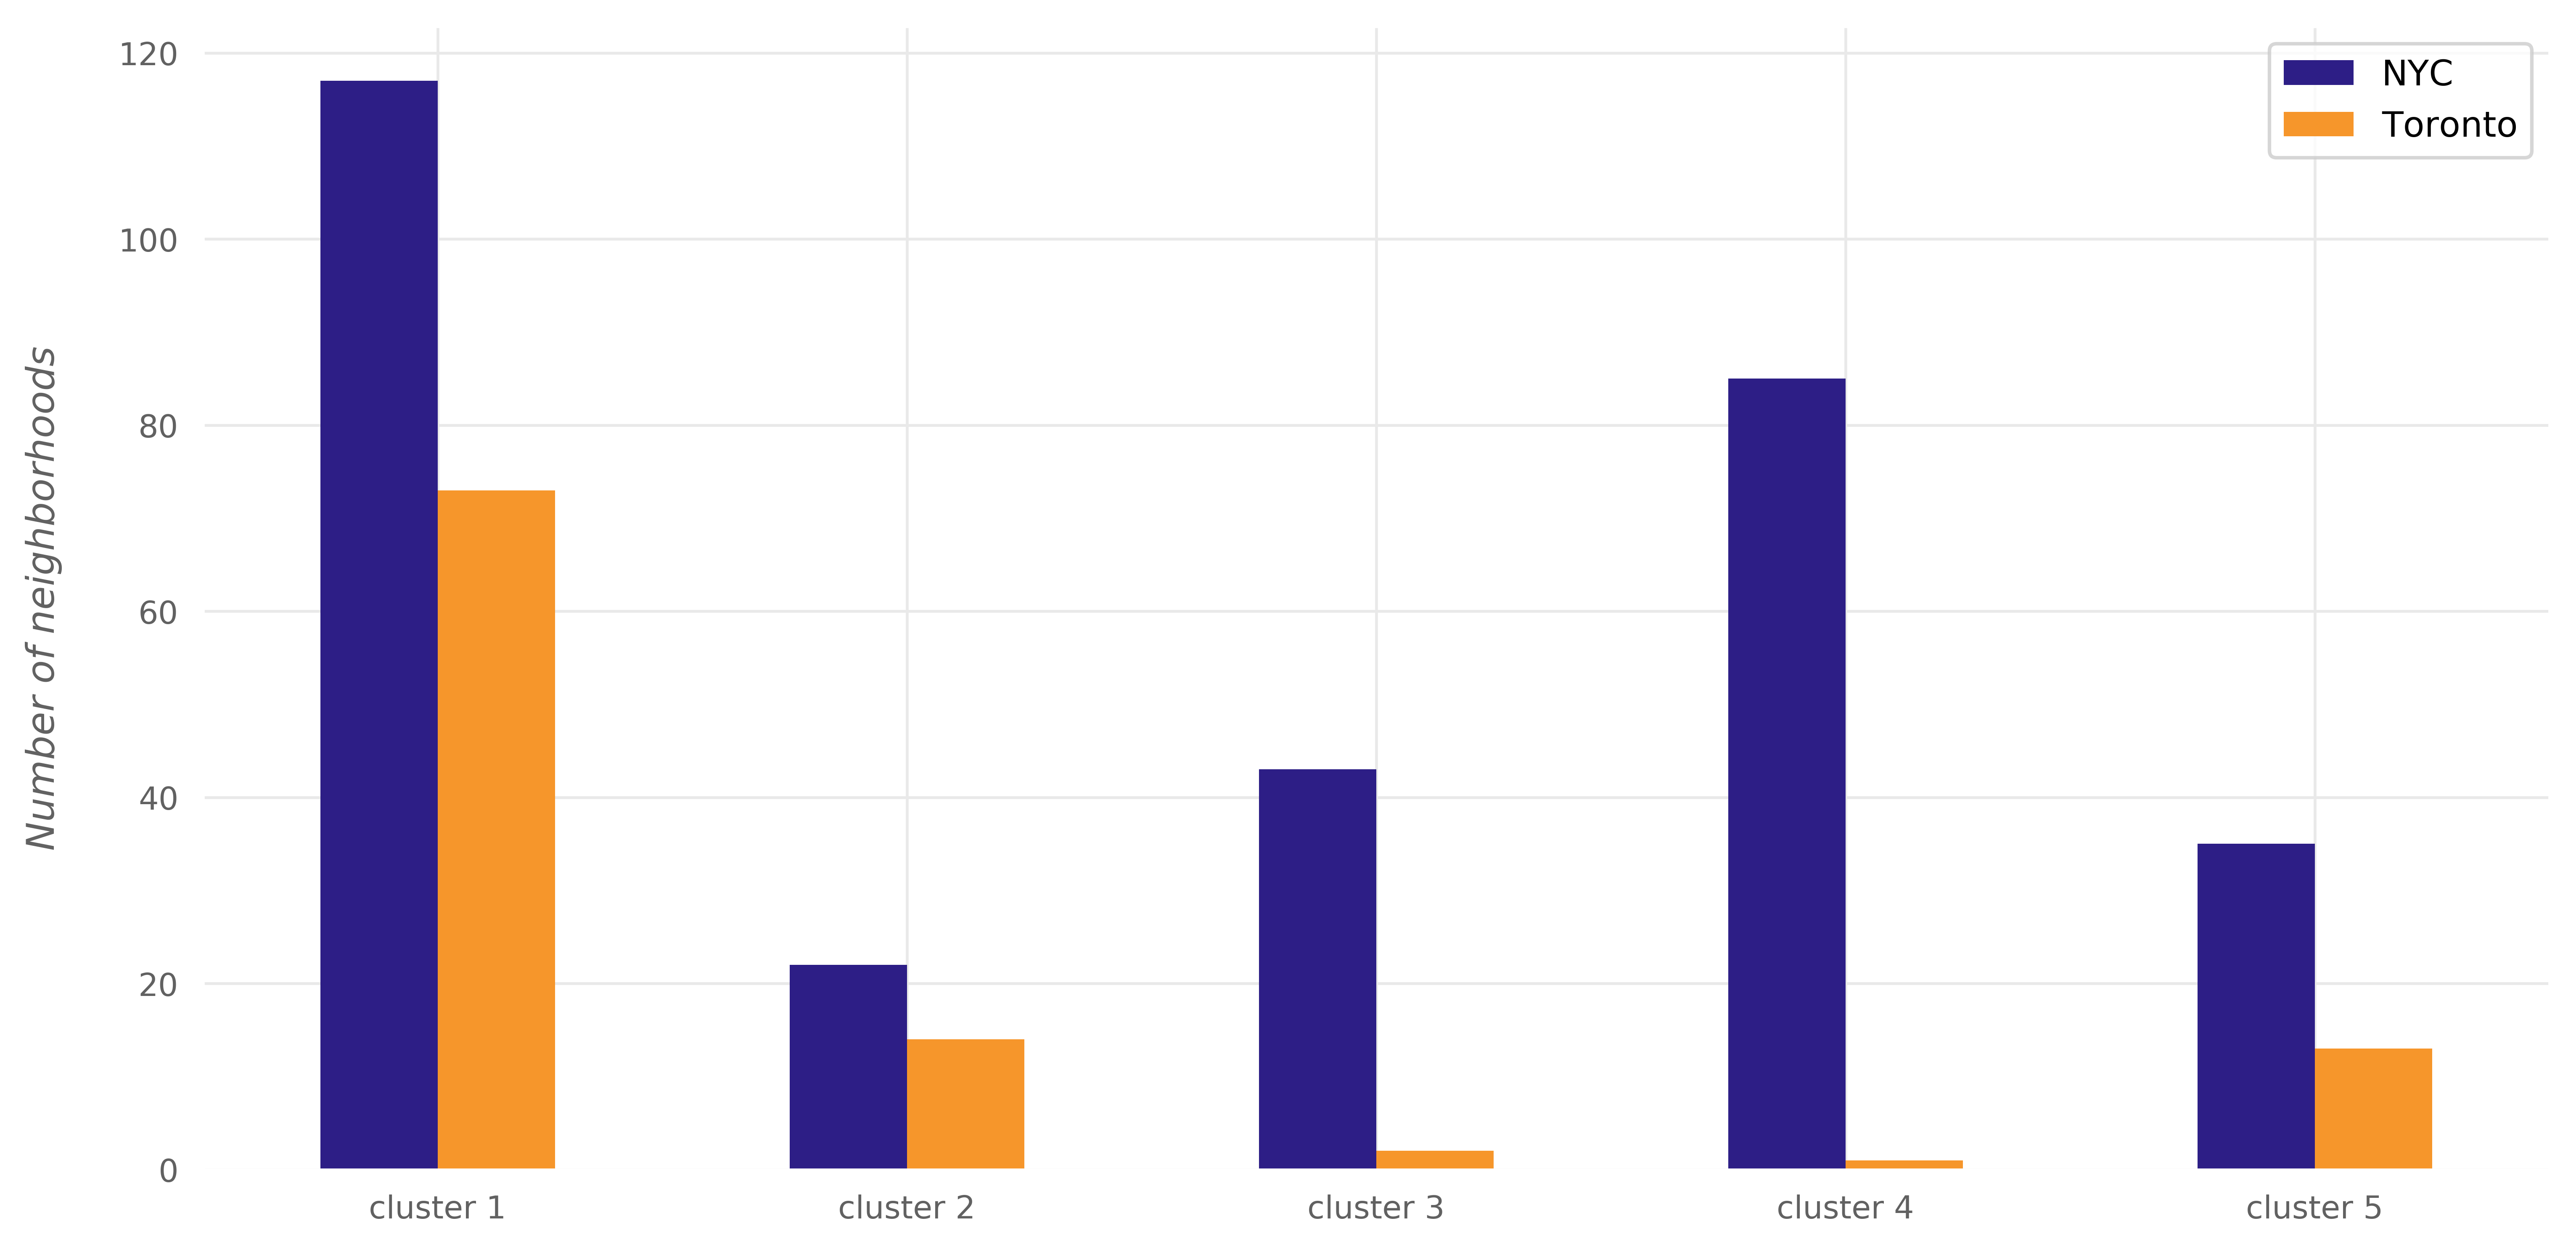

In [109]:
ind = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5']
city_c_df = pd.DataFrame({
    'NYC': [x[0] for x in n_counts],
    'Toronto': [x[1] for x in n_counts]
}, index = ind)

fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
city_c_df.plot(kind='bar', color=['#2d1e86', '#f6962b'], rot=0, ax=ax)
plot_conf(ax, xlbl='', ylbl='Number of neighborhoods', t='')
fig.savefig('city-count.png', dpi=300)